In [1]:
# MNIST - https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/
data_dir = '/Users/rytis/Desktop/EU_parama/data/GTSRB/'

In [2]:
import cv2
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt

In [3]:
def read_dataset(csv_path, images_dir):
    data_dict = {}
    regions_df = pd.read_csv(csv_path)
    # Iterate through each row in the CSV file
    for index, row in regions_df.iterrows():
        img_path = f"{images_dir}/{row['Path']}"
        x, y, w, h = int(row['Roi.X1']), int(row['Roi.Y1']), int(row['Width']), int(row['Height'])
        class_label = int(row['ClassId'])

        # Load the image
        image = cv2.imread(img_path)

        # Extract the specified region
        region = image[y:y+h, x:x+w]

        # Create a class-specific list if it doesn't exist
        if class_label not in data_dict:
            data_dict[class_label] = []

        # Append the extracted region to the corresponding class list
        data_dict[class_label].append(region)
    data_dict = {k: data_dict[k] for k in sorted(data_dict)}
    return data_dict

In [4]:
# load data
# Path to the GTSRB dataset and CSV file
train_csv_file = data_dir + 'Train.csv'
train_dict = read_dataset(train_csv_file, data_dir)
print(f'Training classes {len(train_dict)}')

test_csv_file = data_dir + 'Test.csv'
test_dict = read_dataset(test_csv_file, data_dir)
print(f'Testing classes {len(train_dict)}')

Training classes 43
Testing classes 43


In [5]:
def plot_data_distribution(data_dict, plot_name):
    # Count the number of samples in each class
    class_counts = {class_label: len(regions) for class_label, regions in data_dict.items()}

    # Extract class labels and corresponding counts
    class_labels = list(class_counts.keys())
    class_sample_counts = list(class_counts.values())

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    plt.bar(class_labels, class_sample_counts)
    plt.xlabel('Class Label')
    plt.ylabel('Number of Samples')
    plt.title(f'{plot_name} Number of Samples in Each Class')
    bars = plt.bar(class_labels, class_sample_counts)
    # Add vertical counts on the bars
    for bar, count in zip(bars, class_sample_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, 30, count, ha='center', va='bottom', rotation='vertical')
    plt.xticks(class_labels)
    # Add grid lines in x and y directions
    plt.grid(True, axis='both', linestyle='--', alpha=0.6)
    
    plt.show()

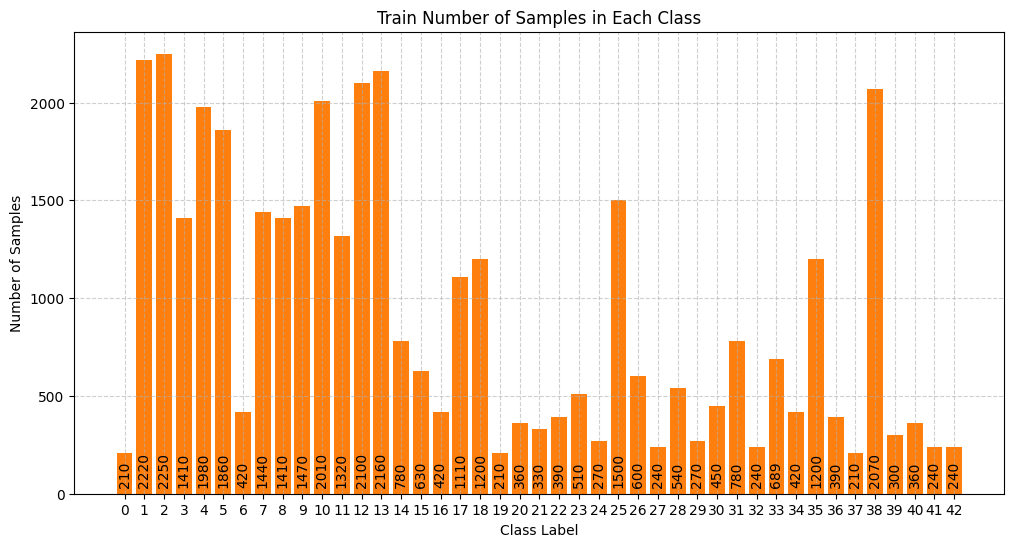

In [6]:
plot_data_distribution(train_dict, 'Train')

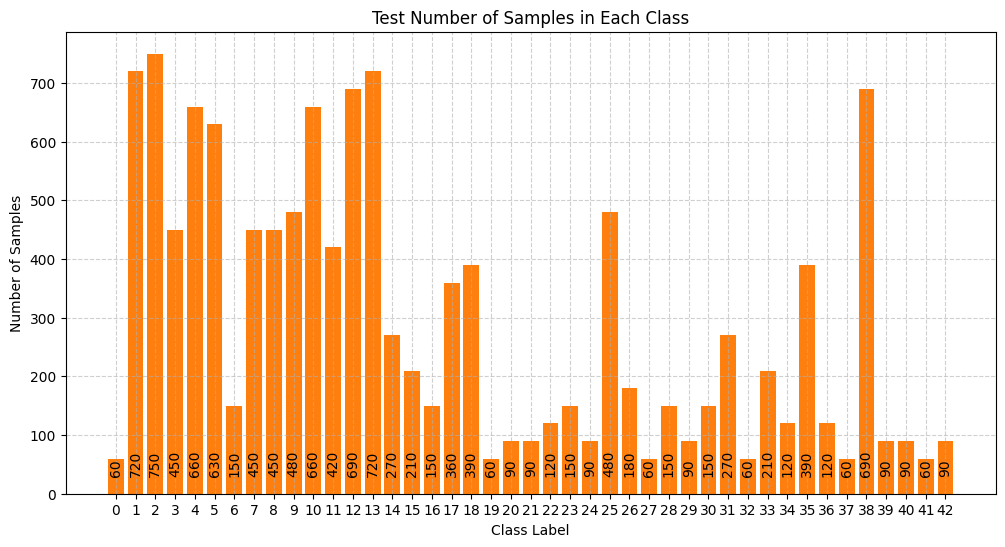

In [7]:
plot_data_distribution(test_dict, 'Test')

In [8]:
# show few sample of each dataset
# Display a few sample images from each class
def preview_dataset(class_regions):
    num_samples_to_display = 3 
    for class_label, regions in class_regions.items():
        plt.figure(figsize=(12, 4))
        plt.suptitle(f'Sample Images for Class {class_label}')
        for i in range(num_samples_to_display):
            plt.subplot(1, num_samples_to_display, i + 1)
            random_region = random.choice(regions)
            plt.imshow(cv2.cvtColor(random_region, cv2.COLOR_BGR2RGB))
            #plt.axis('off')
        plt.tight_layout()  # Add tight layout for subplots
    plt.show()

/var/folders/lg/9zhrbtxs2wb2227l39_4zqx00000gn/T/ipykernel_2993/1671653096.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 4))


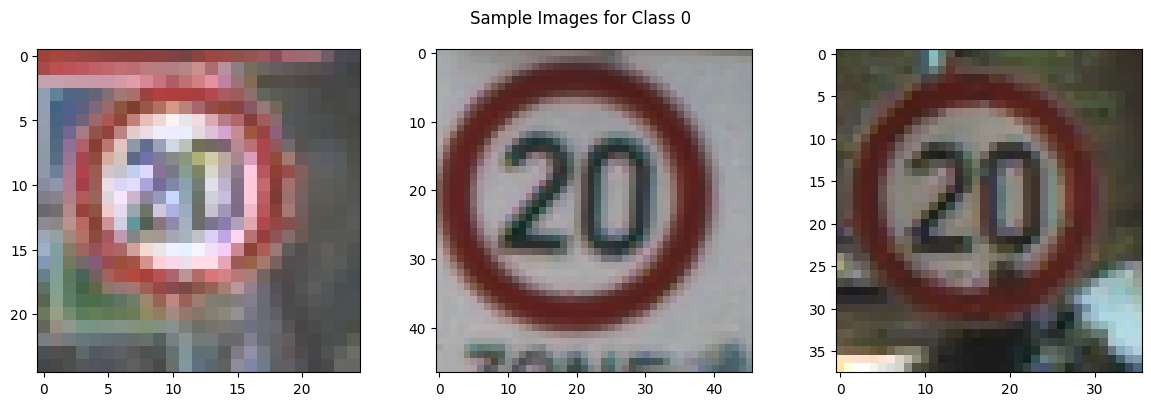

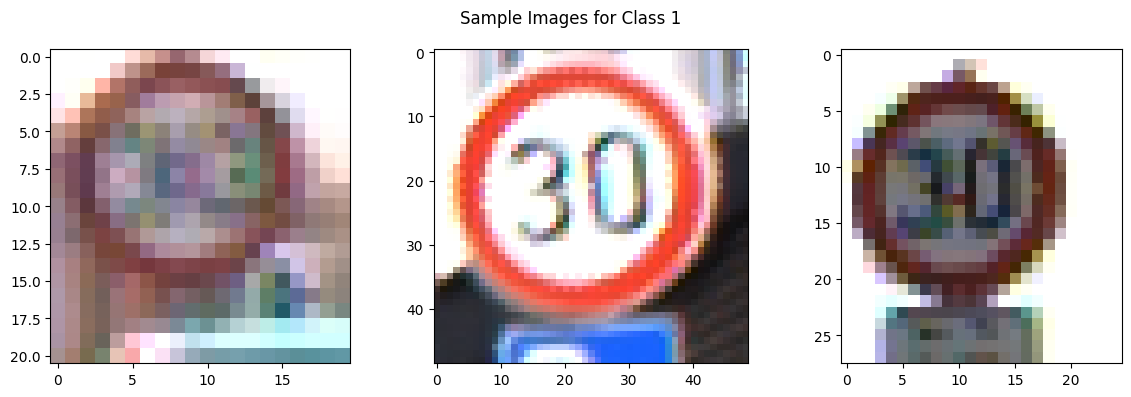

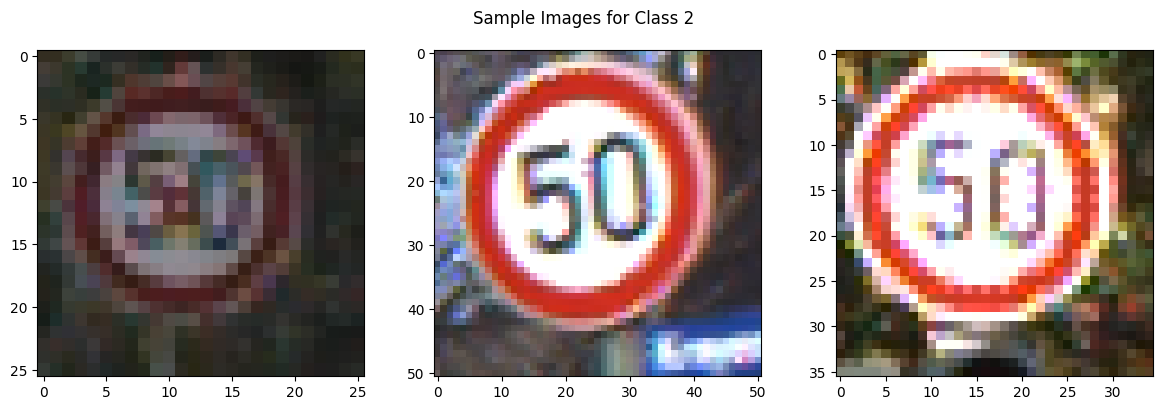

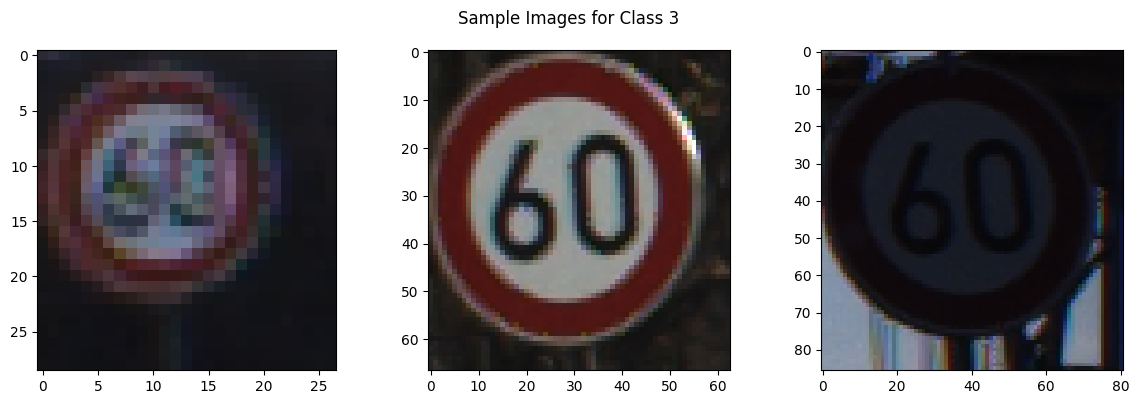

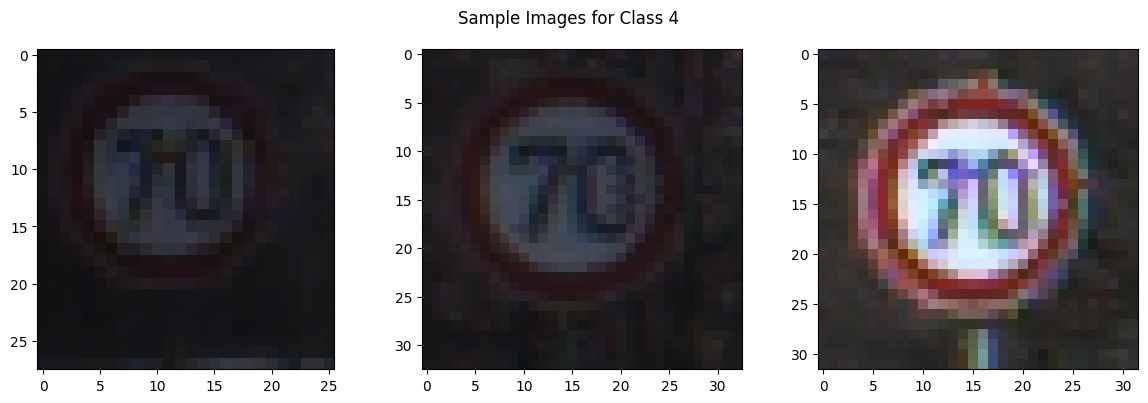

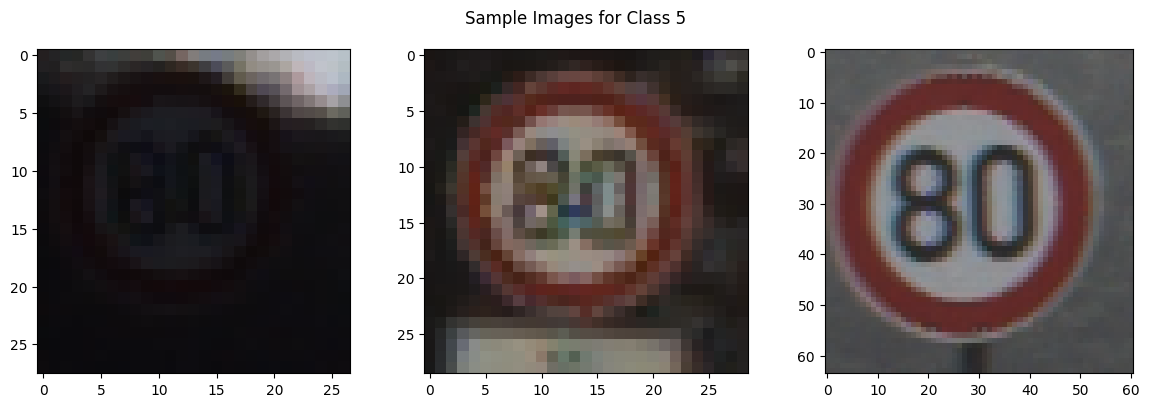

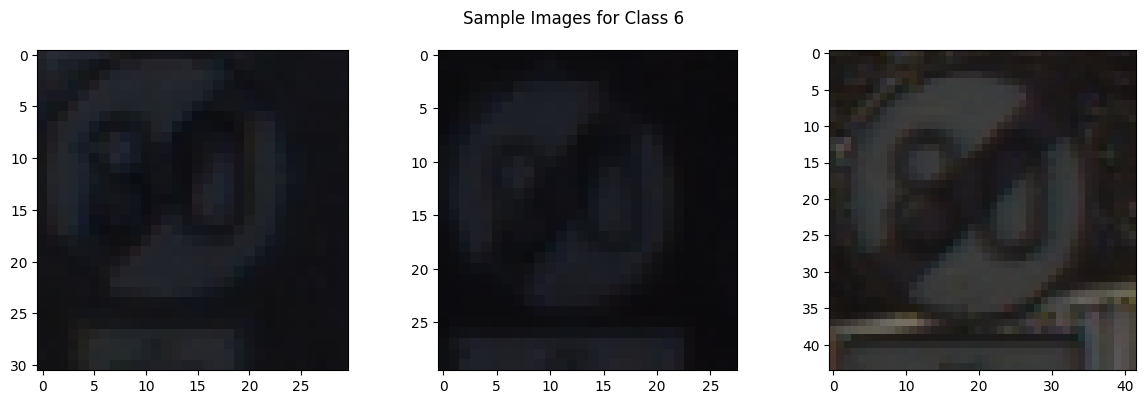

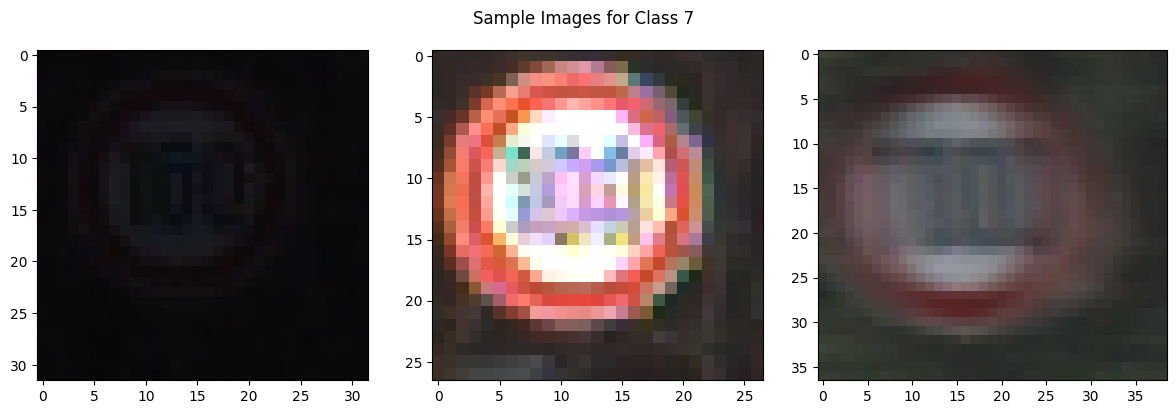

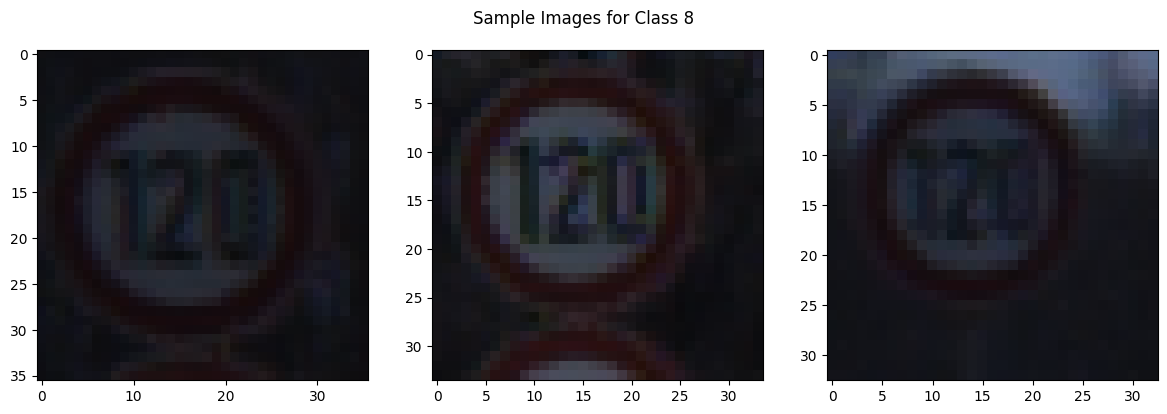

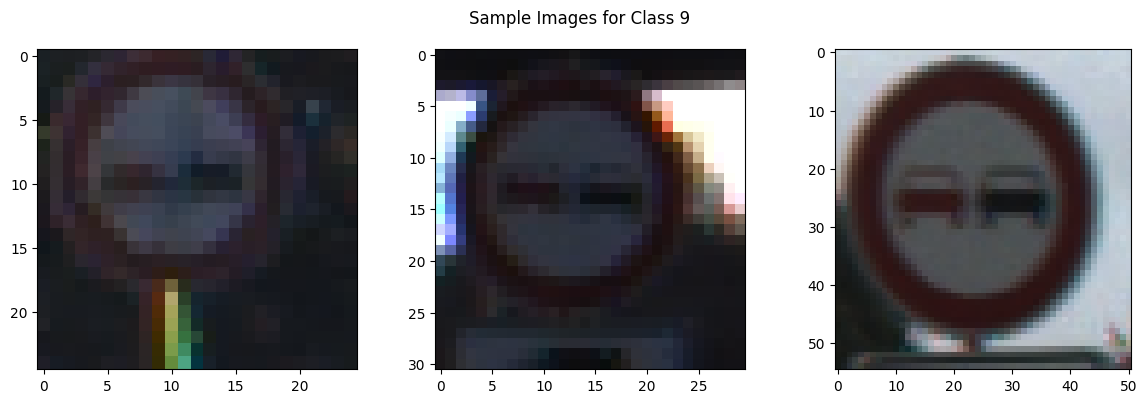

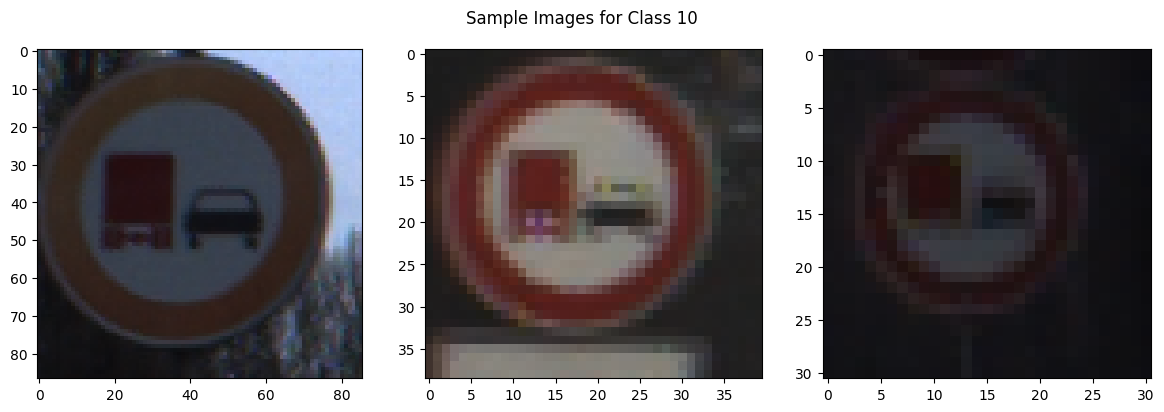

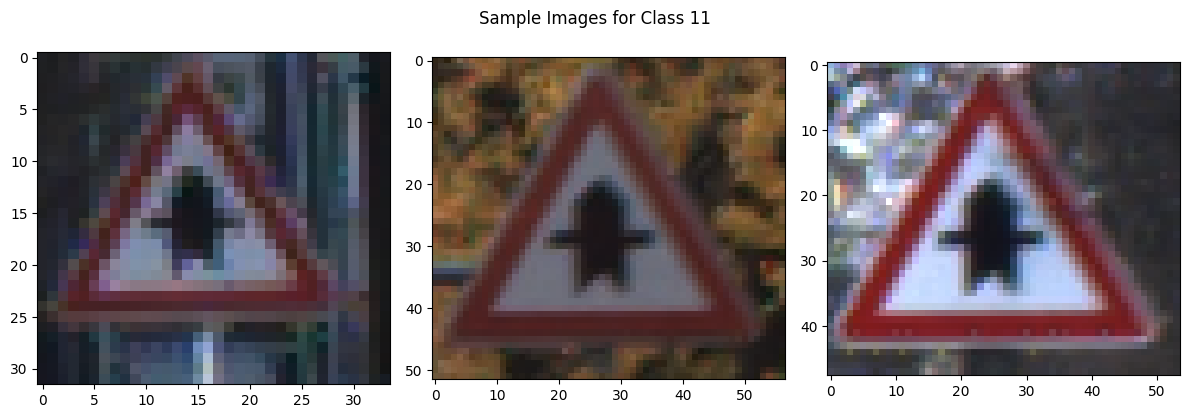

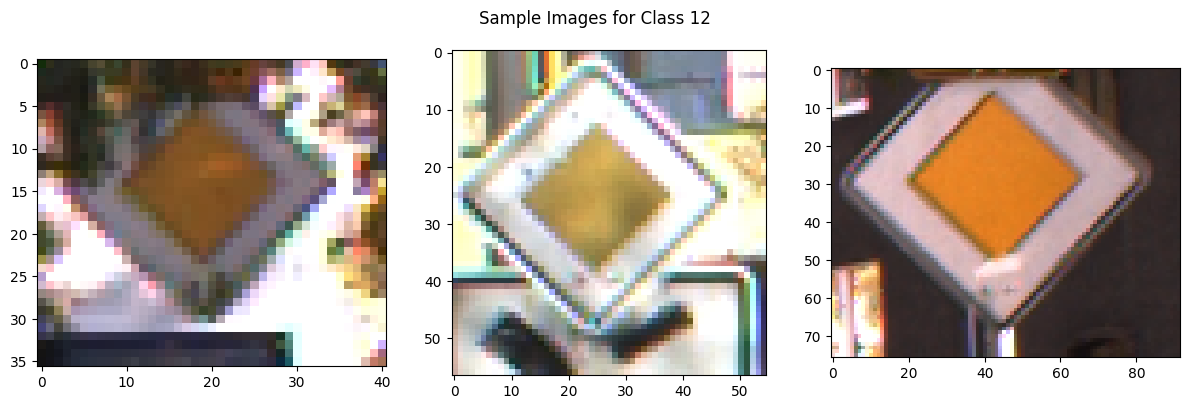

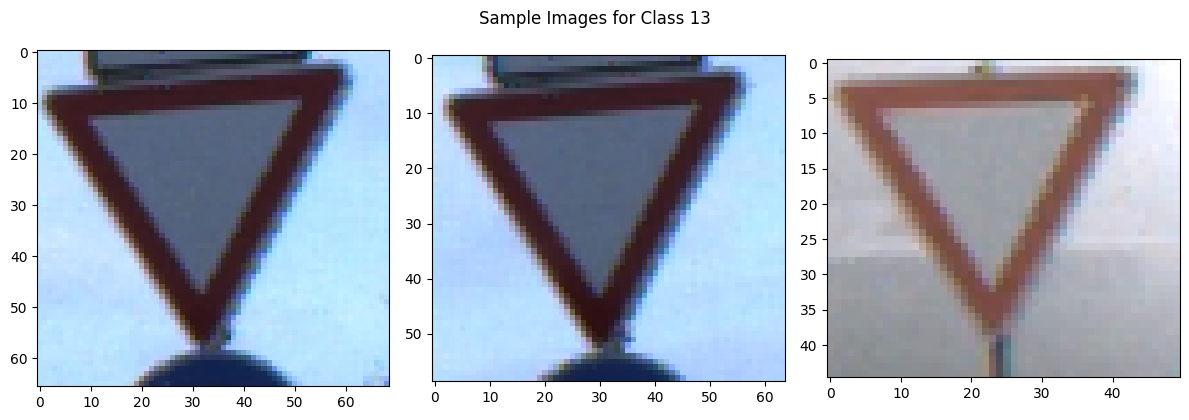

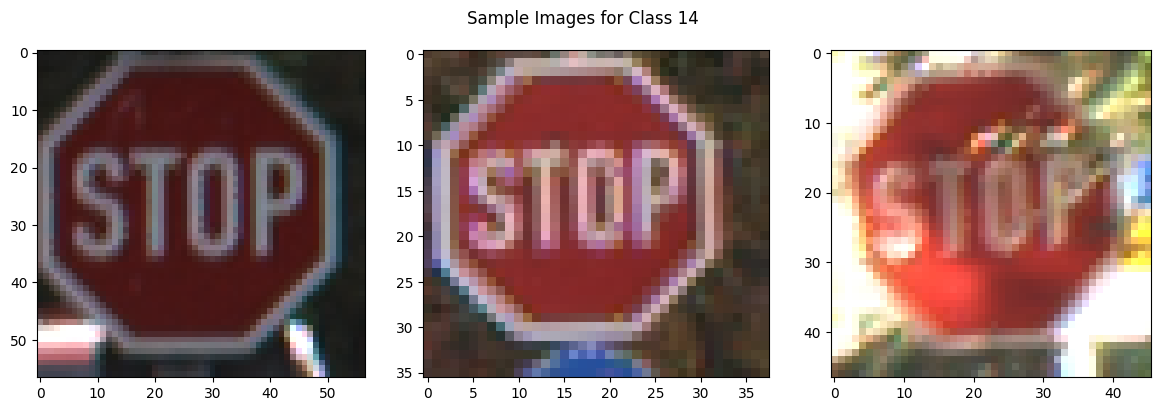

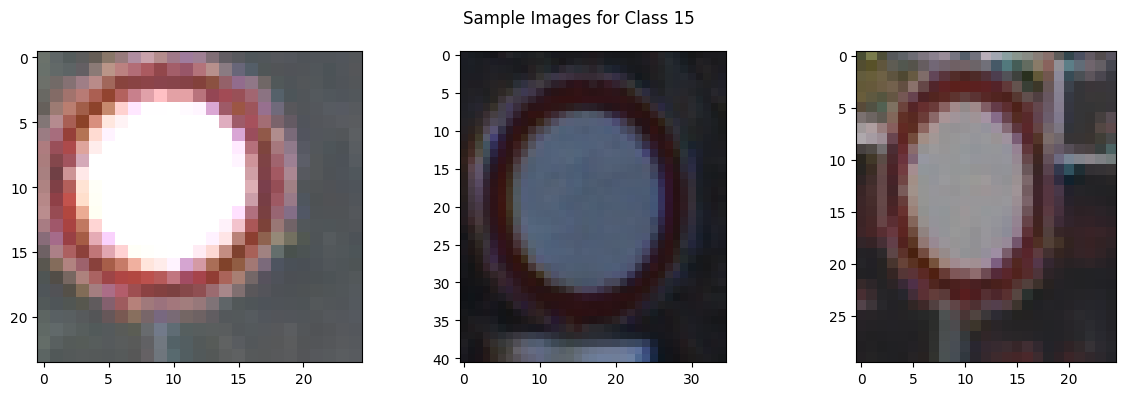

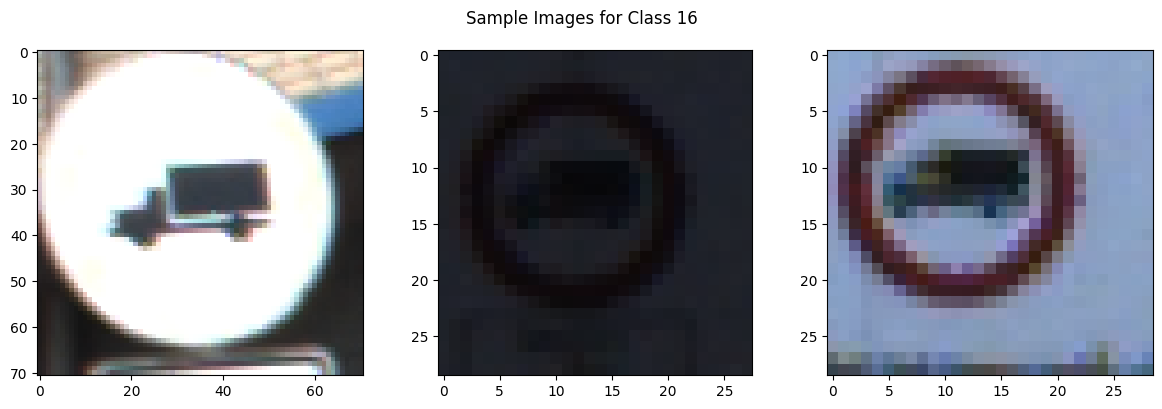

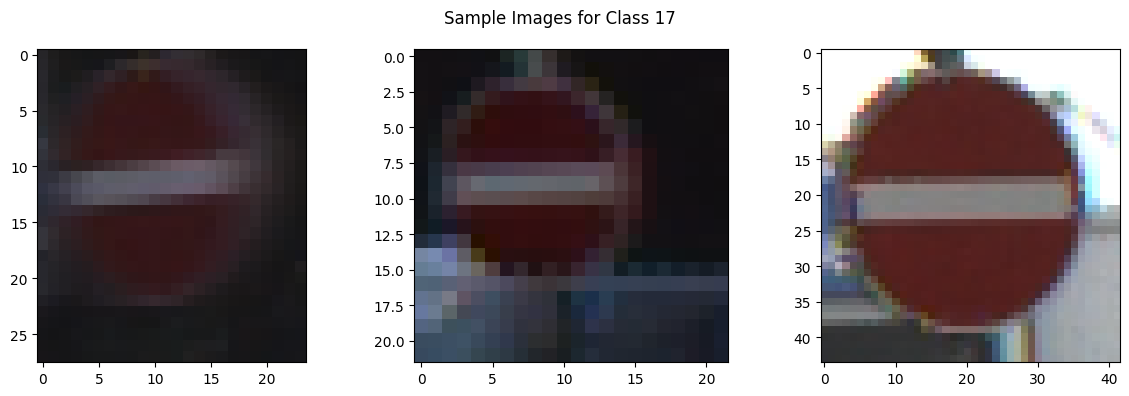

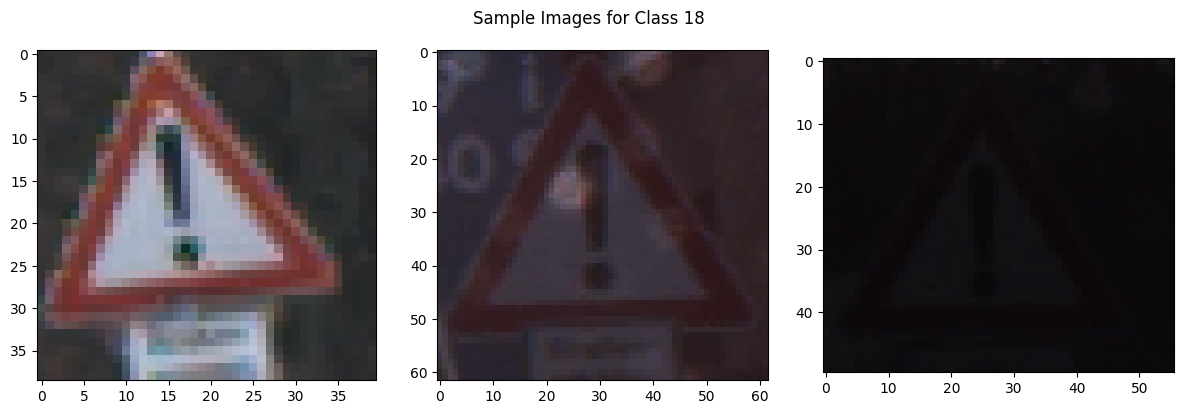

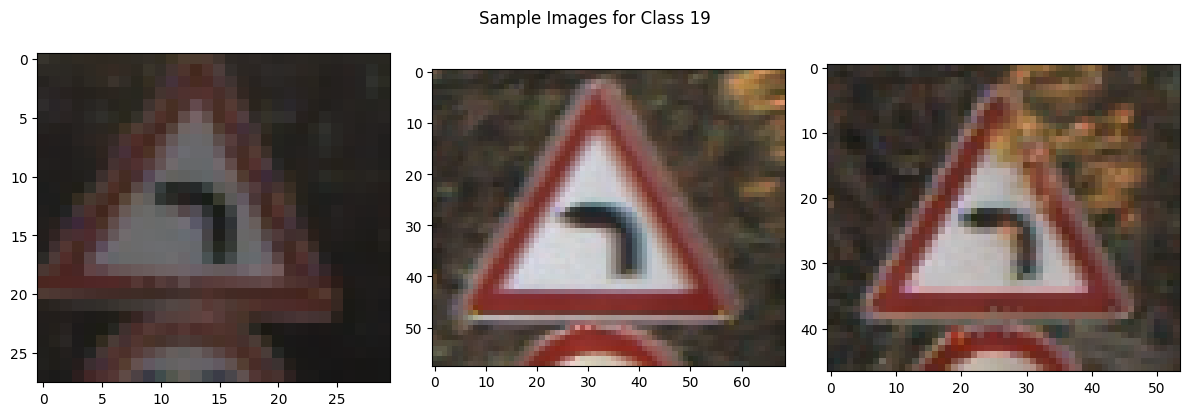

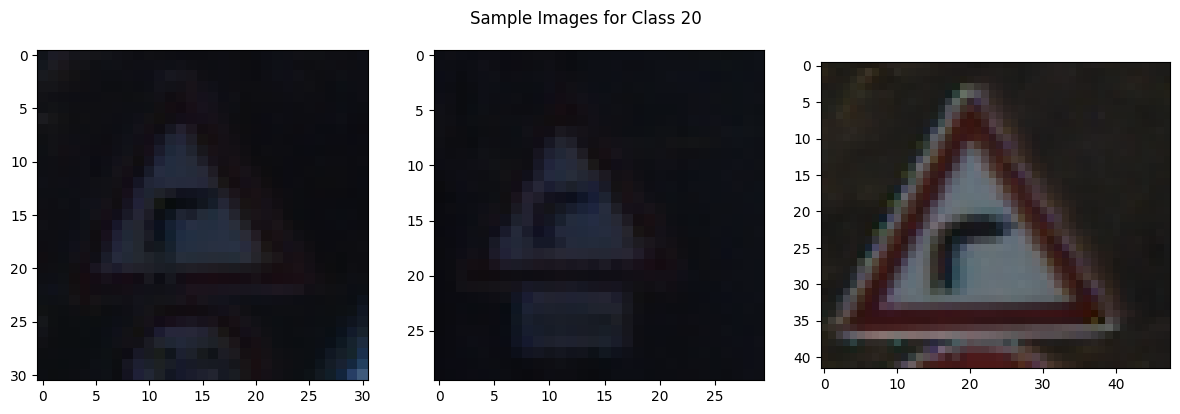

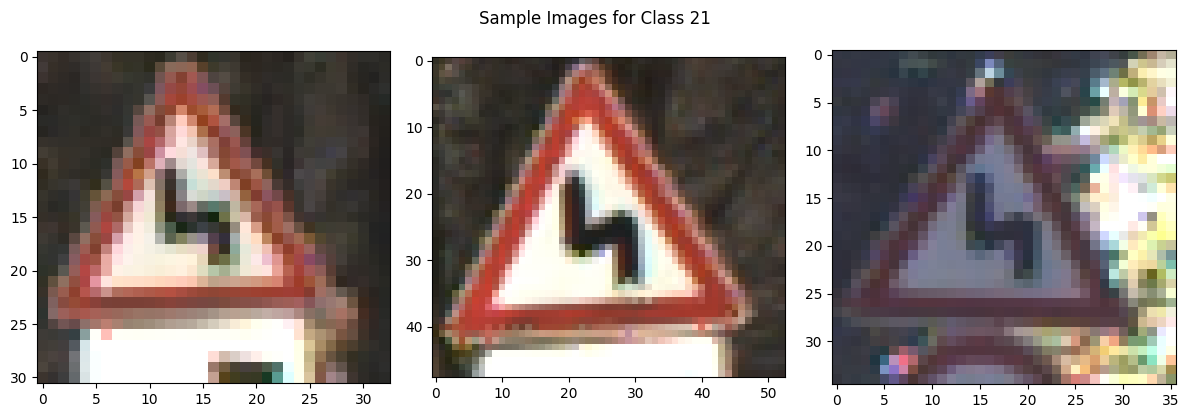

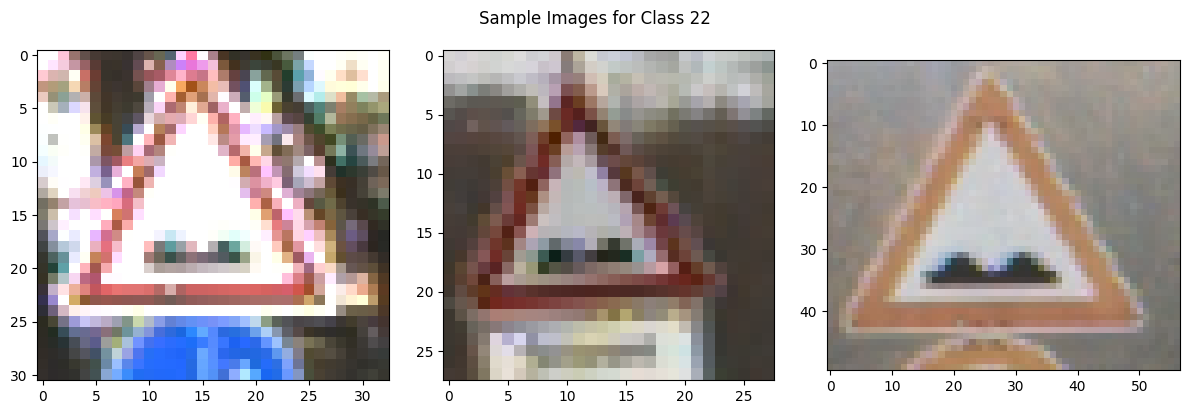

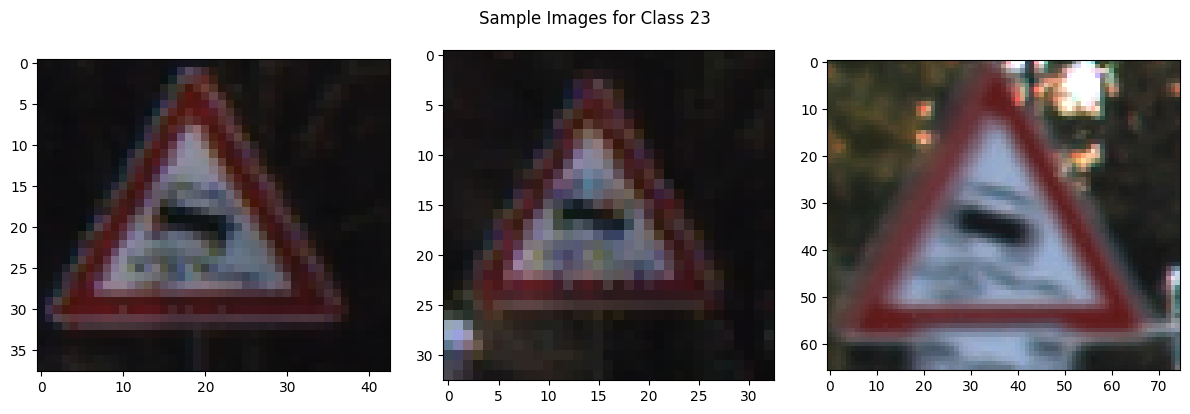

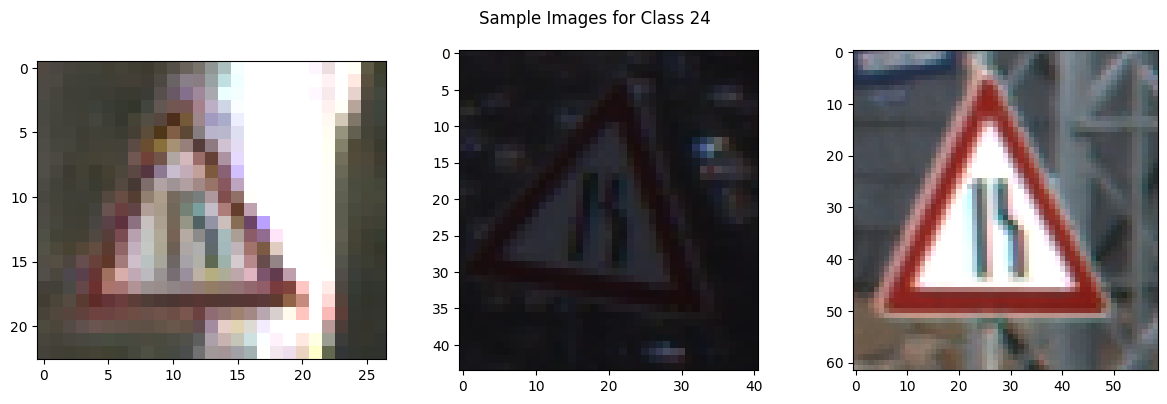

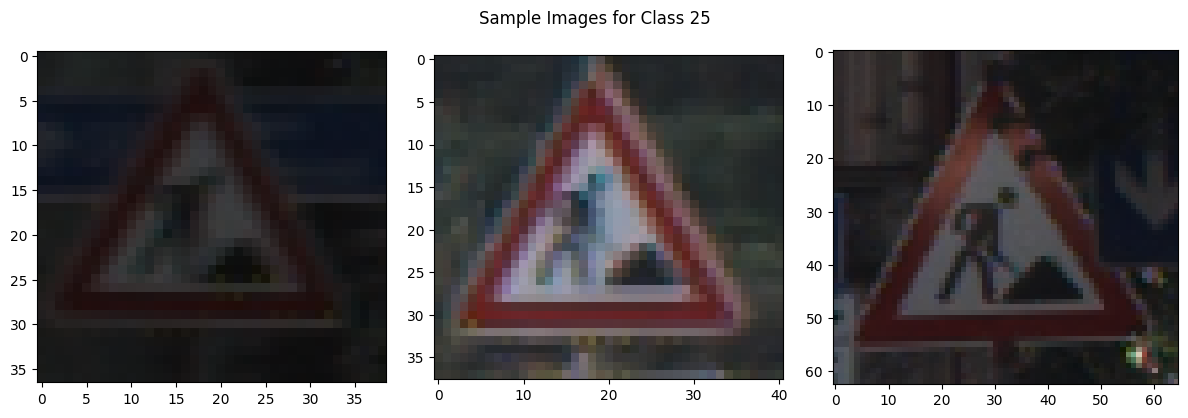

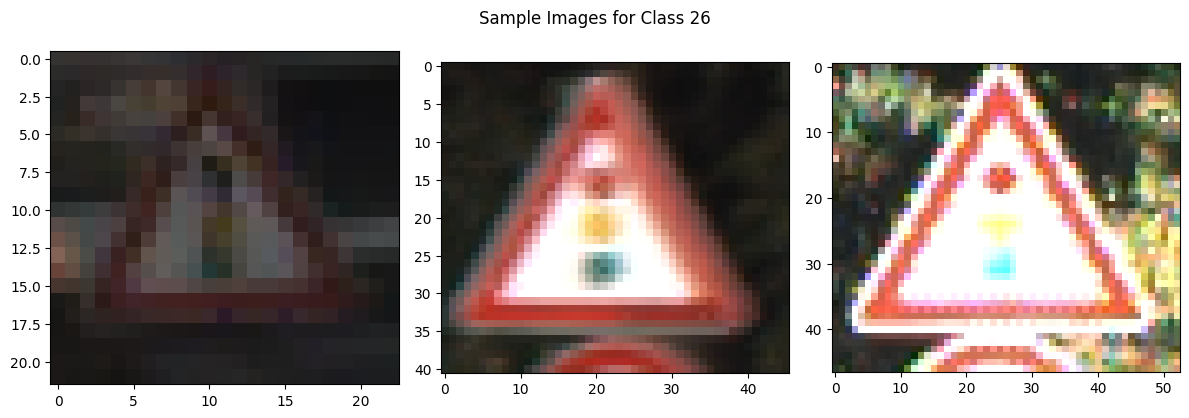

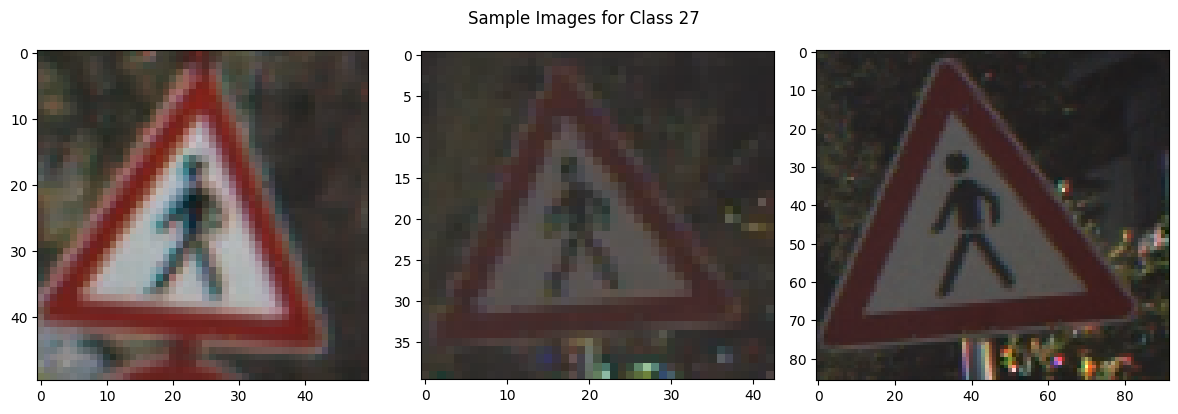

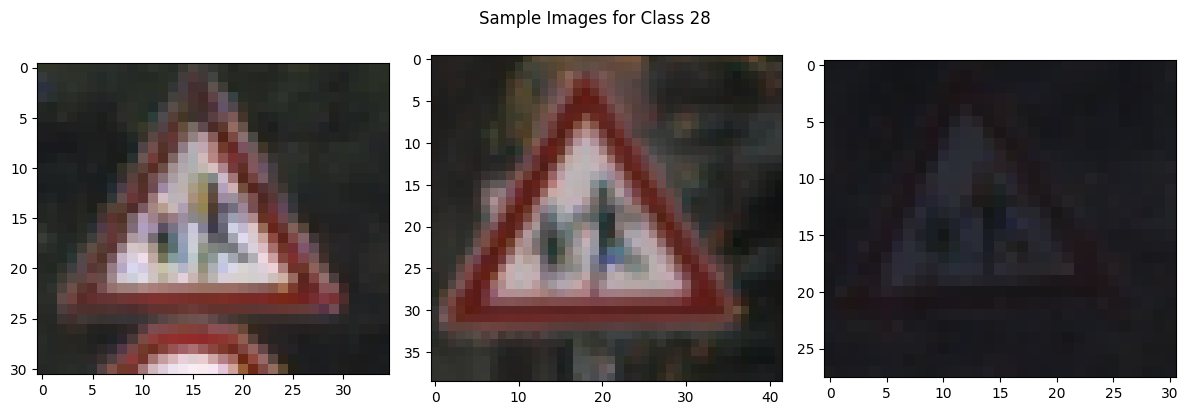

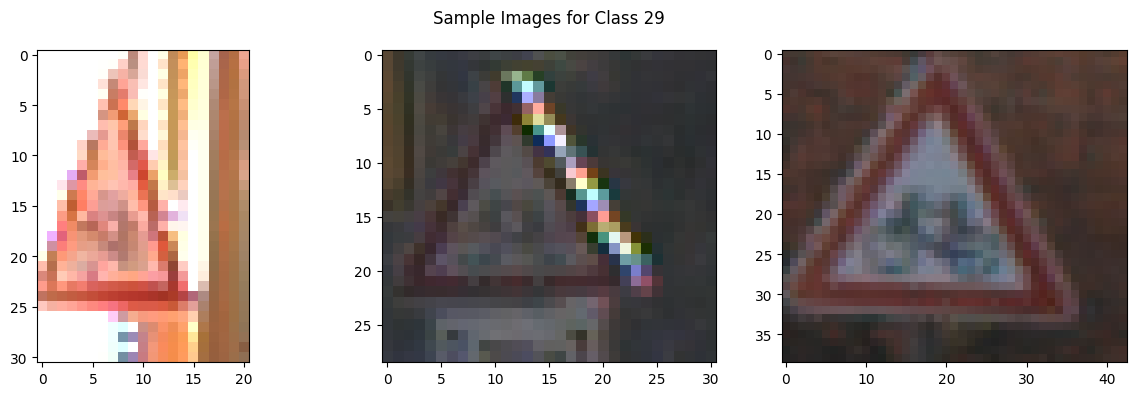

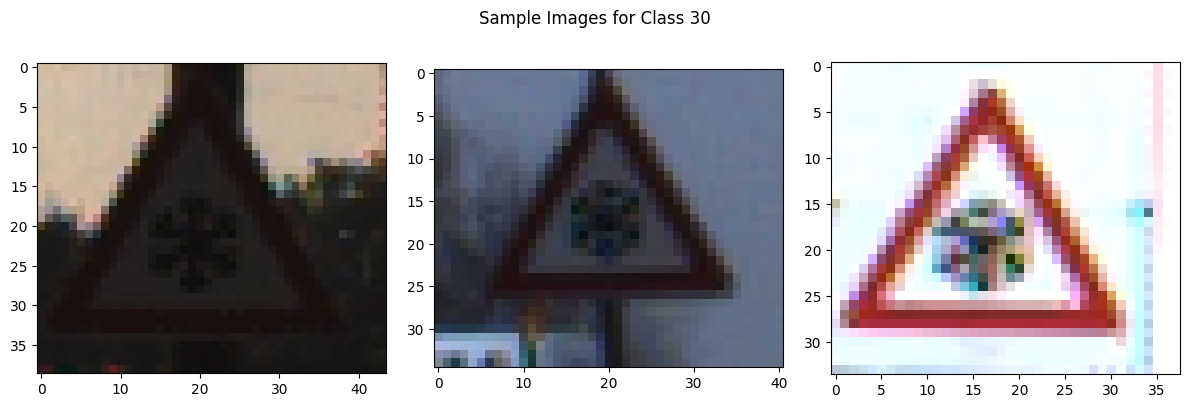

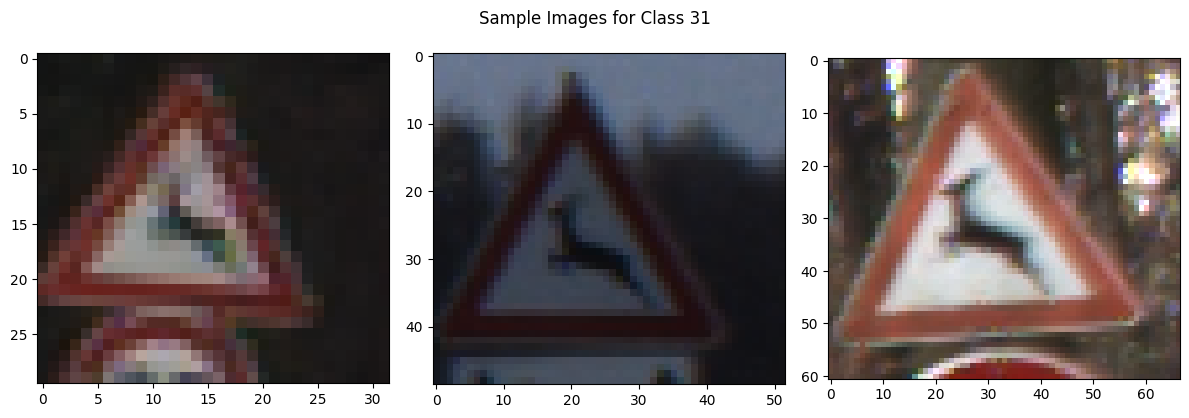

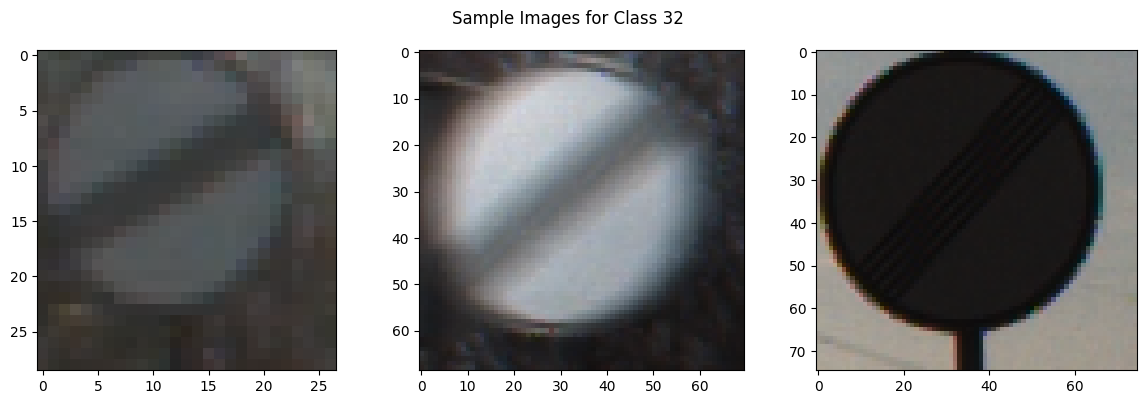

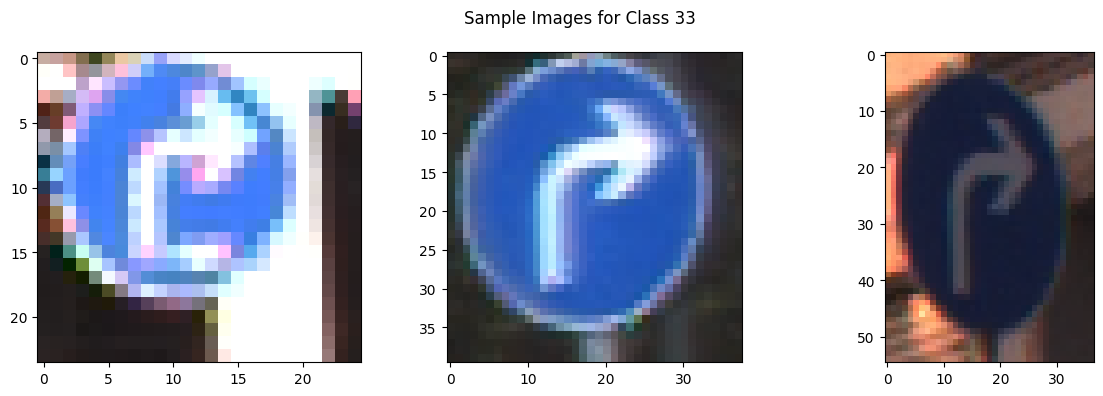

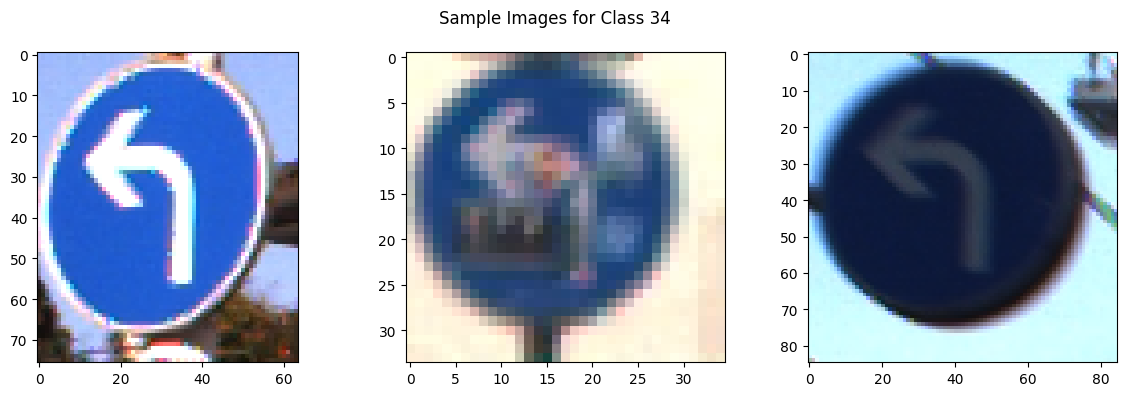

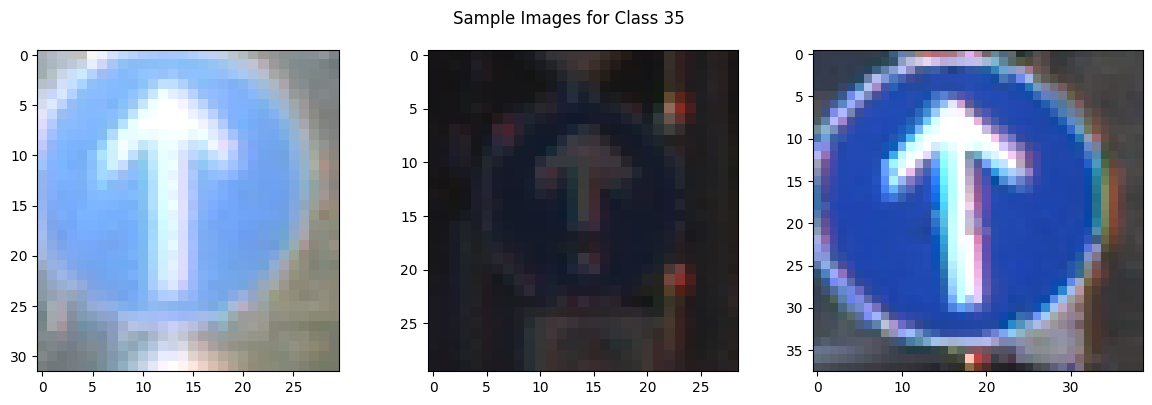

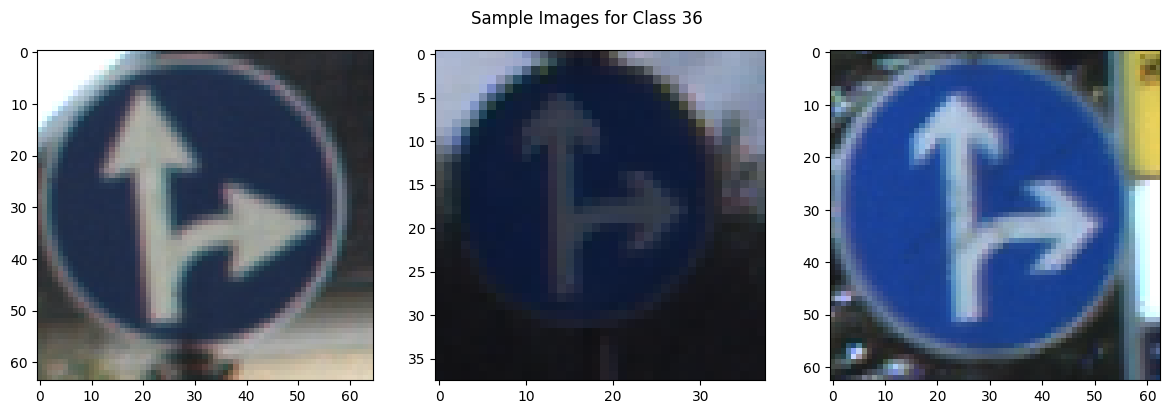

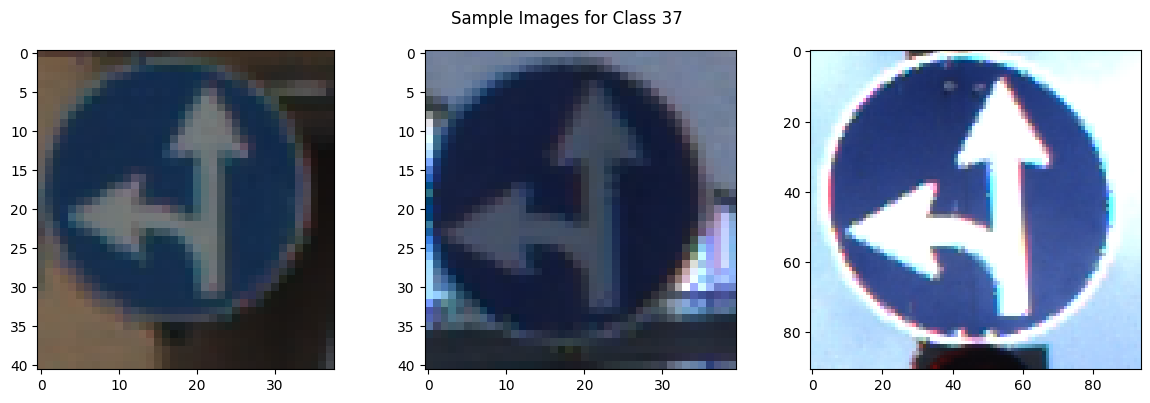

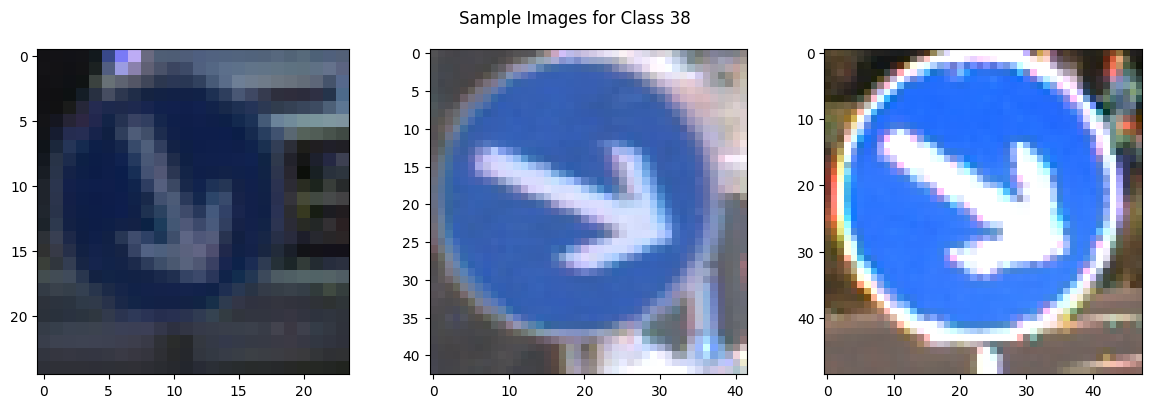

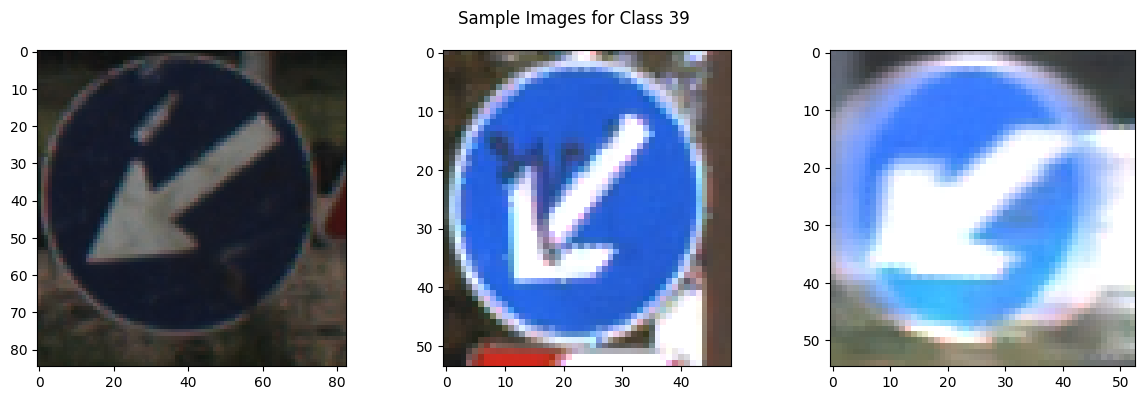

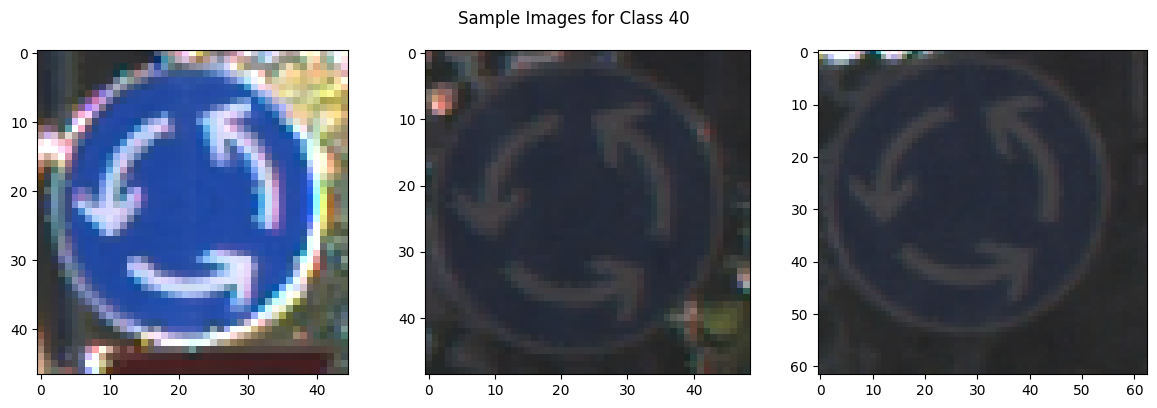

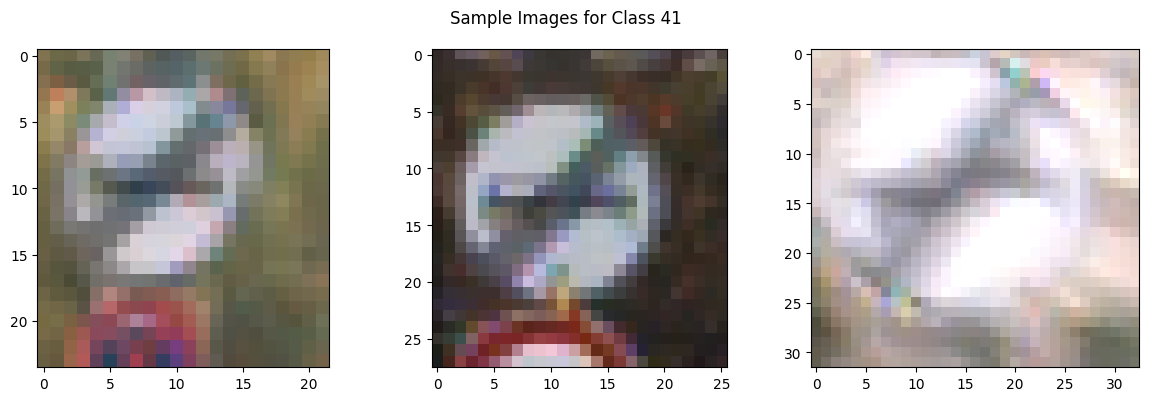

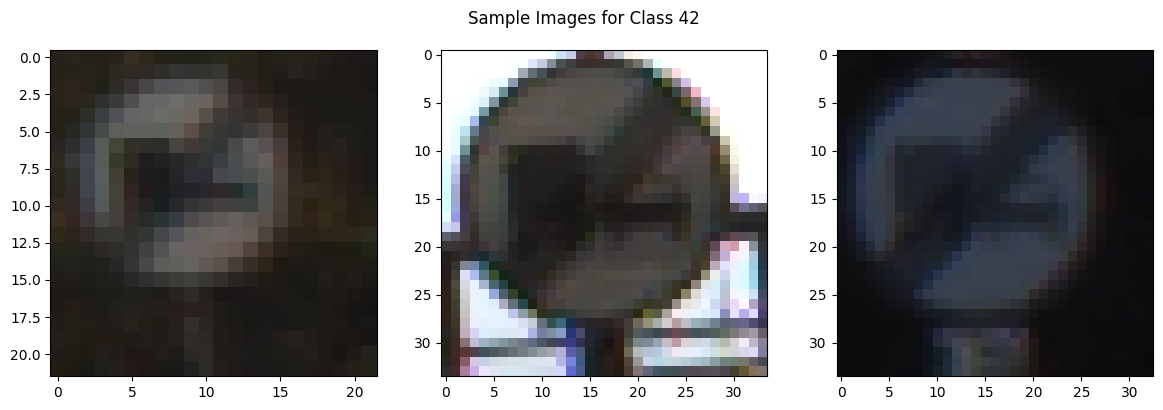

In [9]:
preview_dataset(train_dict)

In [13]:
def get_histograms(class_regions):
    # Create a dictionary to store histograms for each class
    class_histograms = {}

    # Iterate through each class
    for class_label, regions in class_regions.items():
        # Initialize an empty list to store histograms for this class
        histograms_per_channel = []

        for region in regions:
            # Calculate and store the histogram
            pixel_count = region.size  # Calculate pixel count
            histogram = np.array([cv2.calcHist([region], [channel], None, [256], [0, 256])
                                  for channel in range(3)]) / pixel_count # Separate histograms for Red, Green, and Blue
            histograms_per_channel.append(histogram)  # Divide histogram values by pixel count
        # Compute the average histogram for the class
        average_histogram = np.mean(np.array(histograms_per_channel), axis=0)
        # Store the average histogram
        class_histograms[class_label] = average_histogram
        
    return class_histograms

In [14]:
train_classes_histograms = get_histograms(train_dict)

In [15]:
def plot_channel_histograms_for_class(class_label, histograms):
    plt.figure(figsize=(8, 6))
    plt.title(f'RGB Histogram for Class {class_label}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.plot(histograms[2, :], color='red', label='Red Channel')
    plt.plot(histograms[1, :], color='green', label='Green Channel')
    plt.plot(histograms[0, :], color='blue', label='Blue Channel')

    plt.legend()
    plt.grid()
    plt.show()

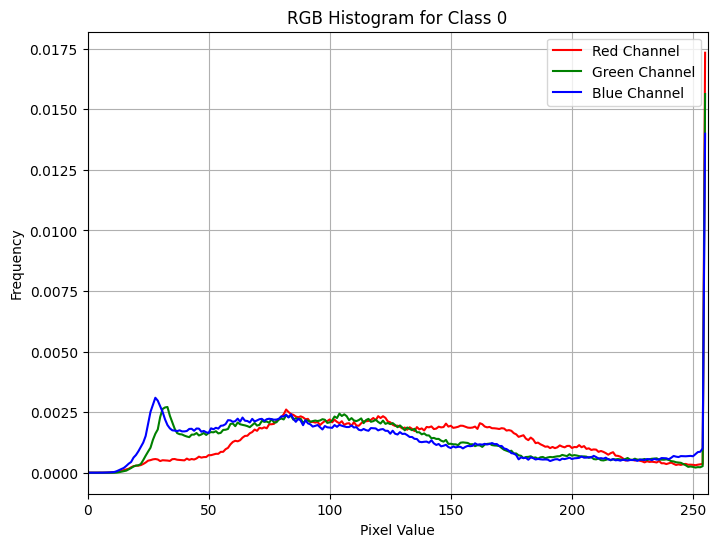

(3, 256, 1)


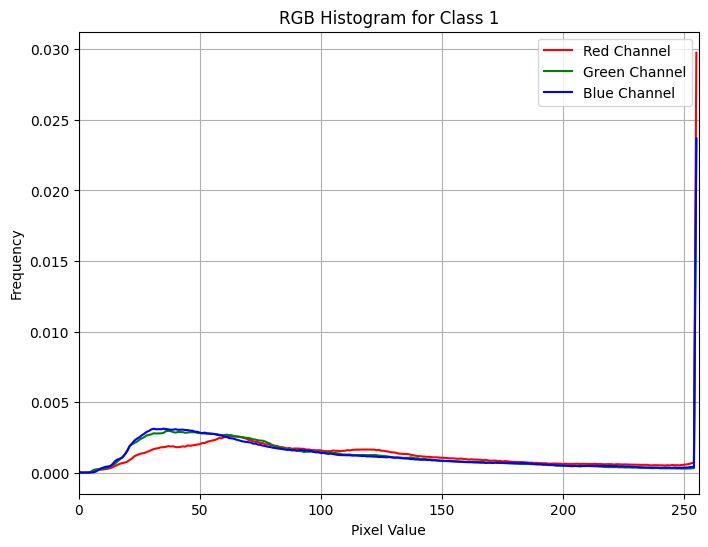

(3, 256, 1)


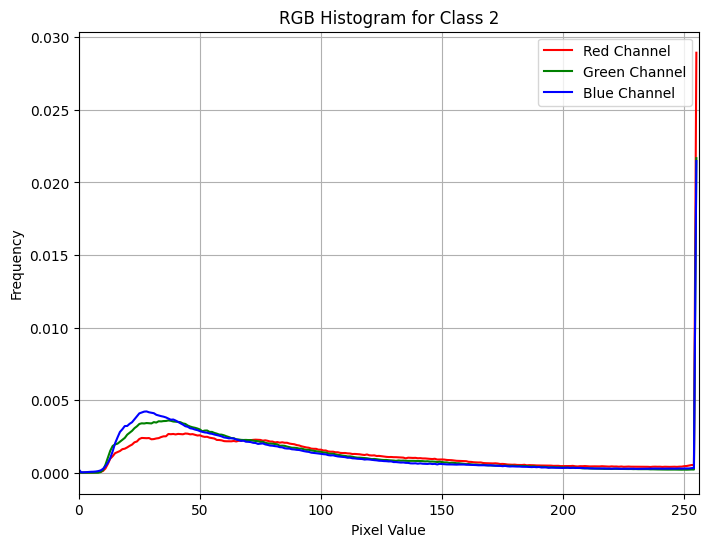

(3, 256, 1)


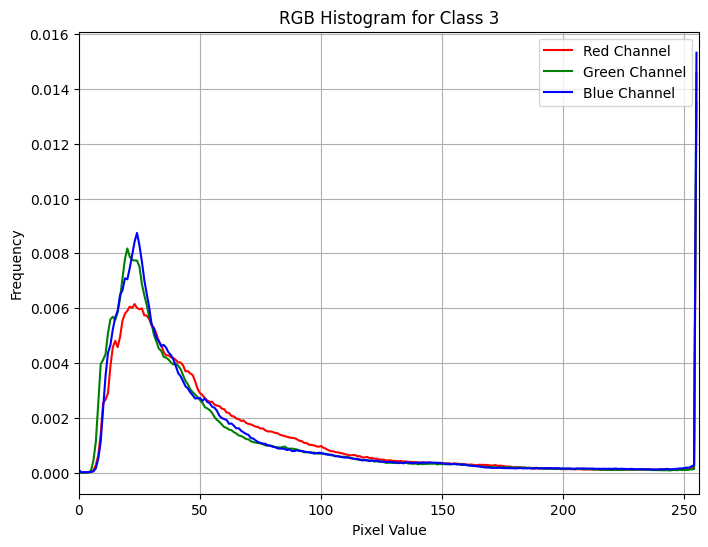

(3, 256, 1)


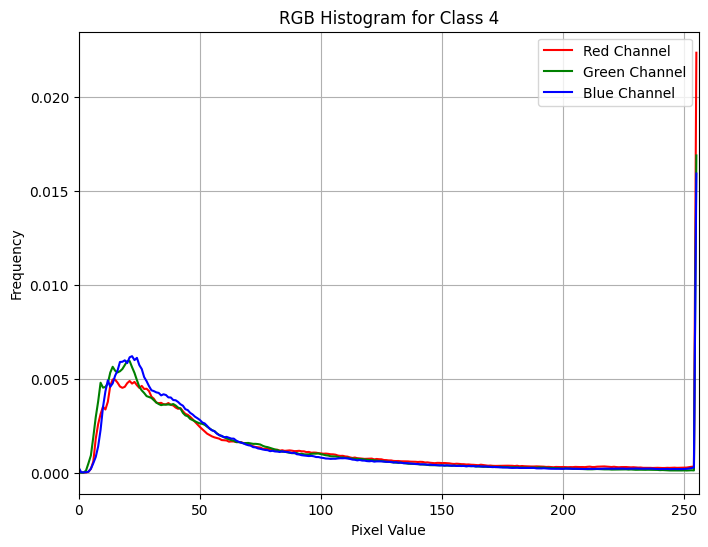

(3, 256, 1)


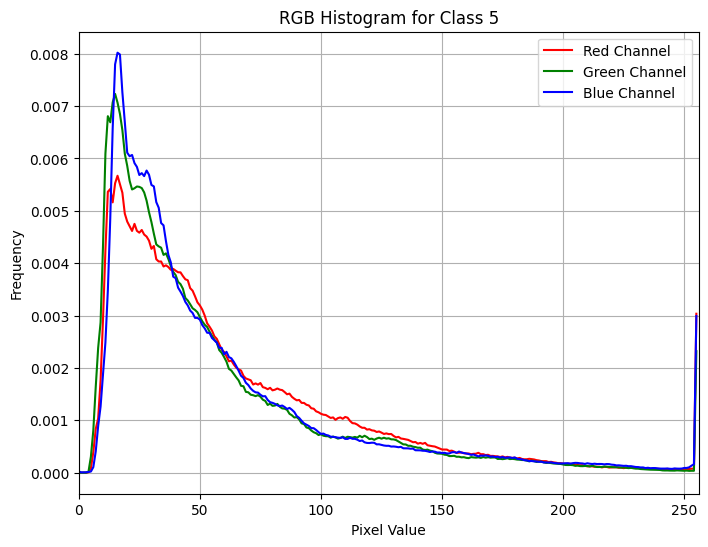

(3, 256, 1)


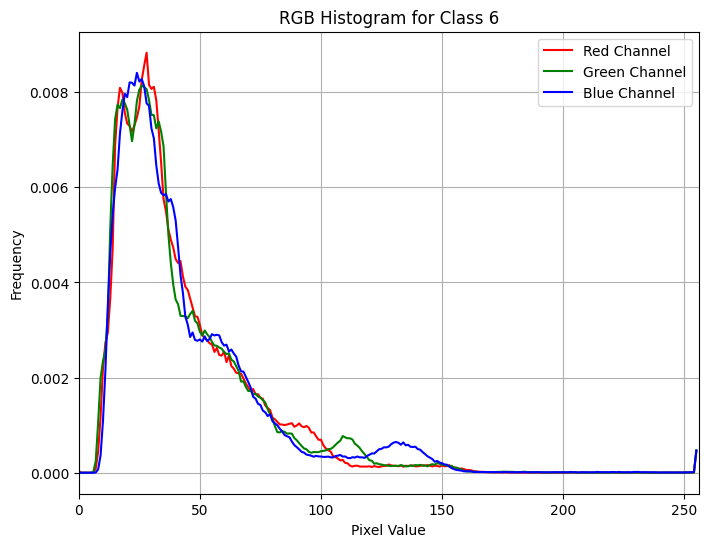

(3, 256, 1)


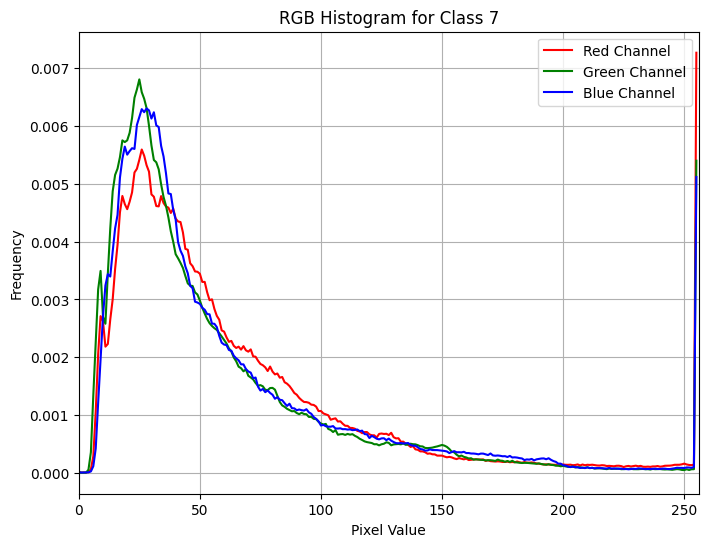

(3, 256, 1)


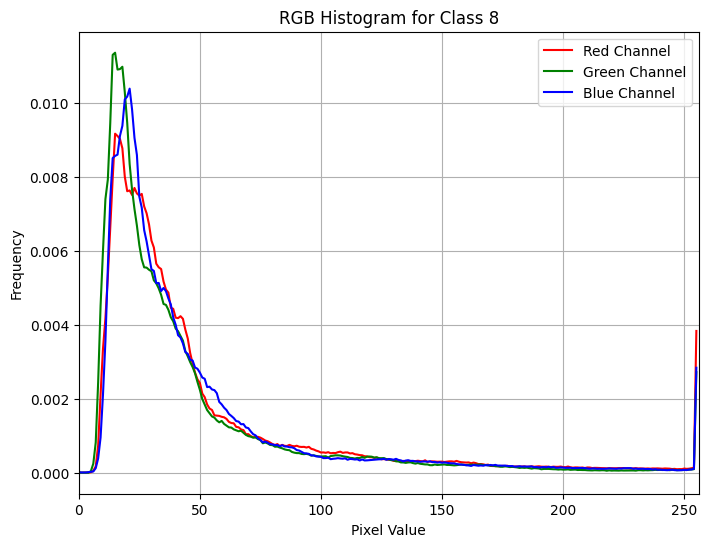

(3, 256, 1)


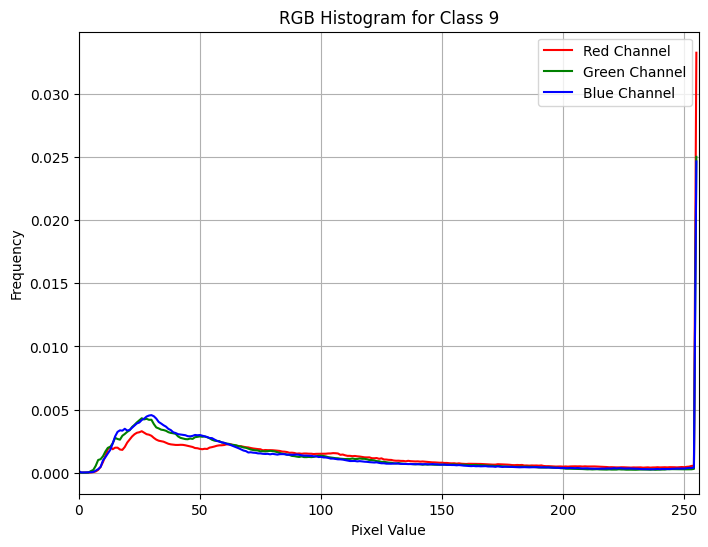

(3, 256, 1)


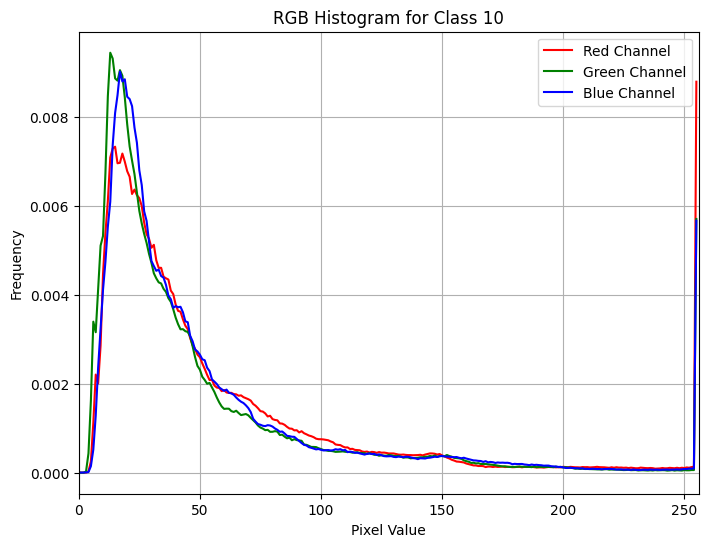

(3, 256, 1)


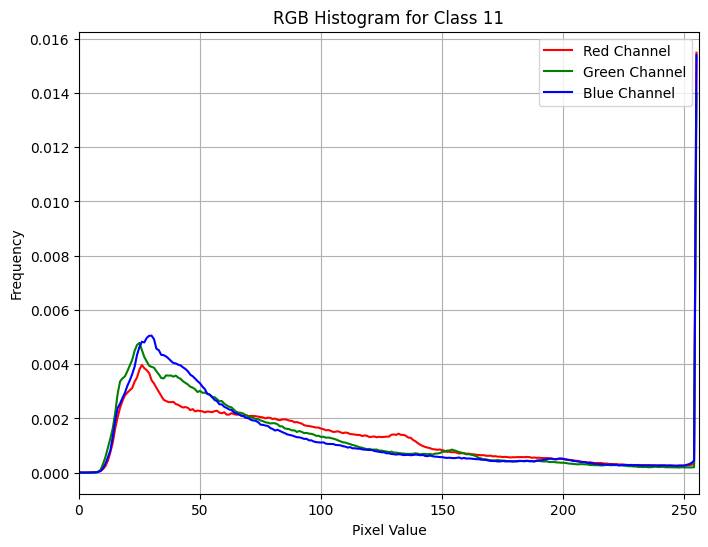

(3, 256, 1)


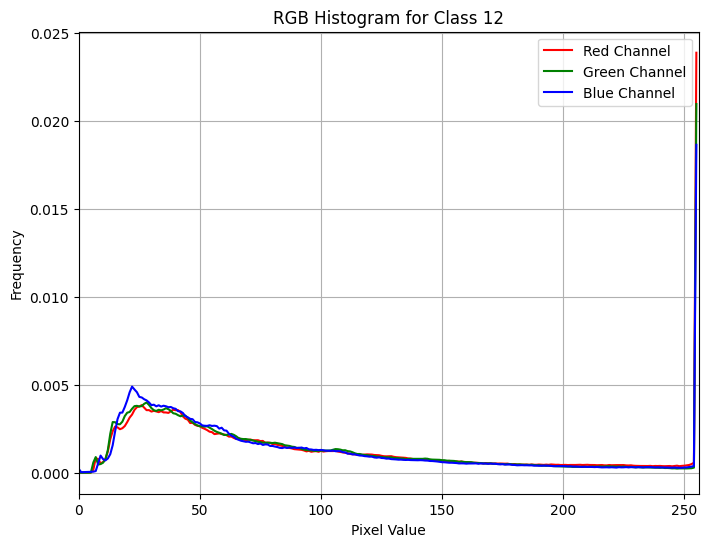

(3, 256, 1)


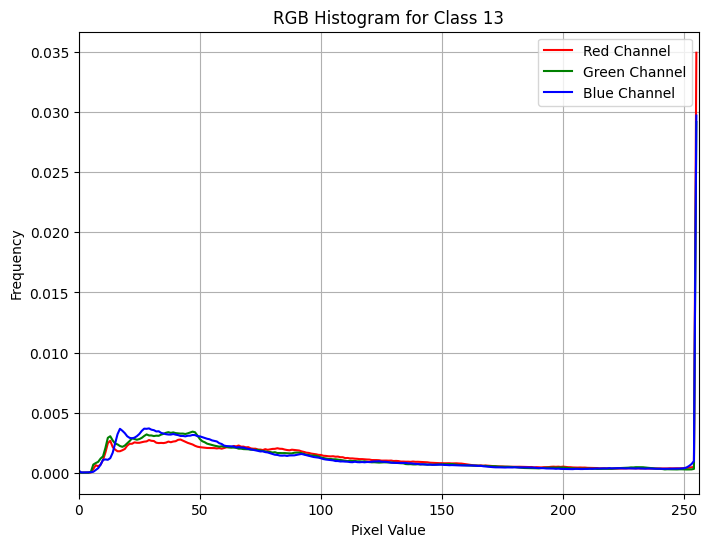

(3, 256, 1)


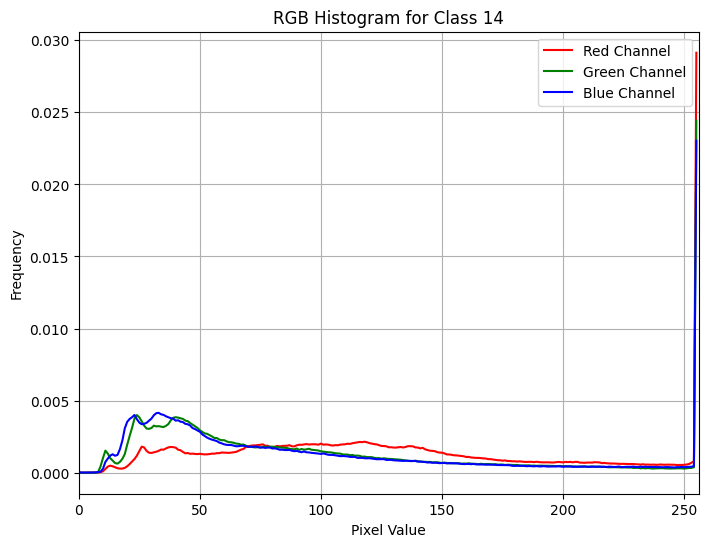

(3, 256, 1)


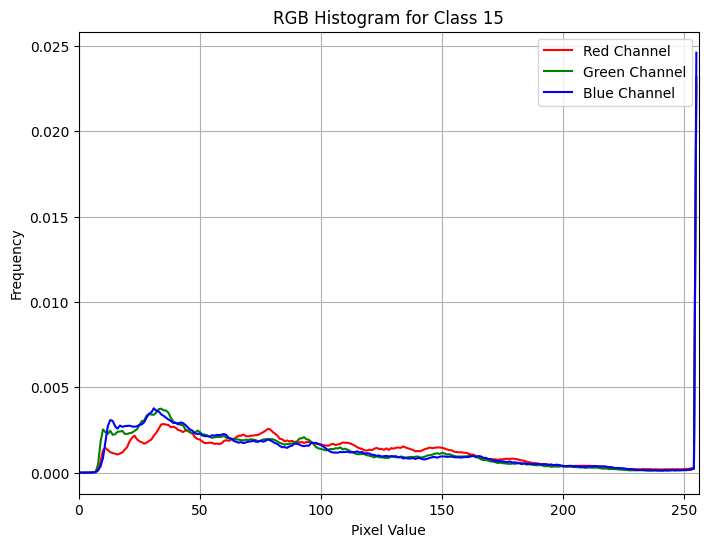

(3, 256, 1)


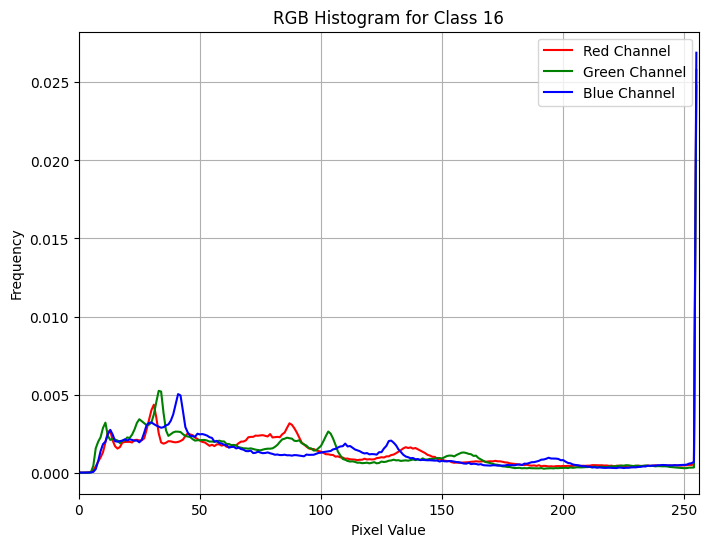

(3, 256, 1)


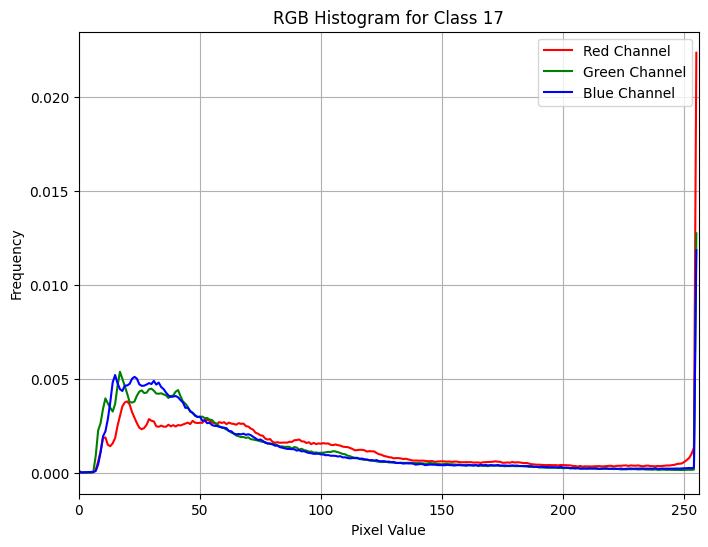

(3, 256, 1)


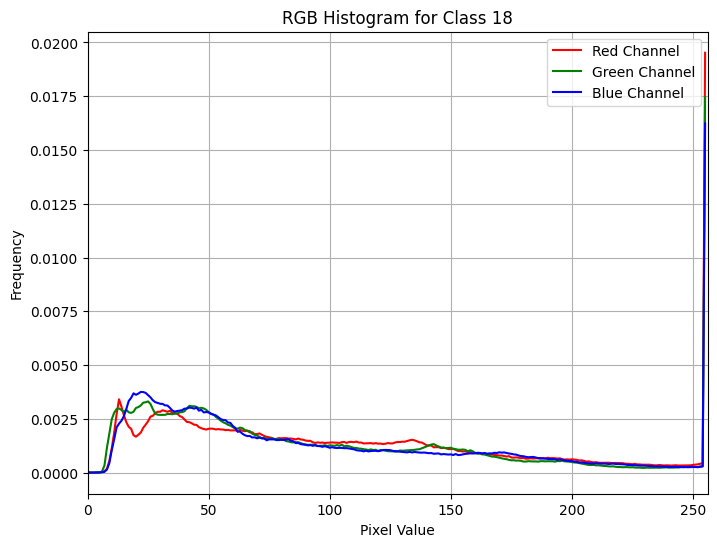

(3, 256, 1)


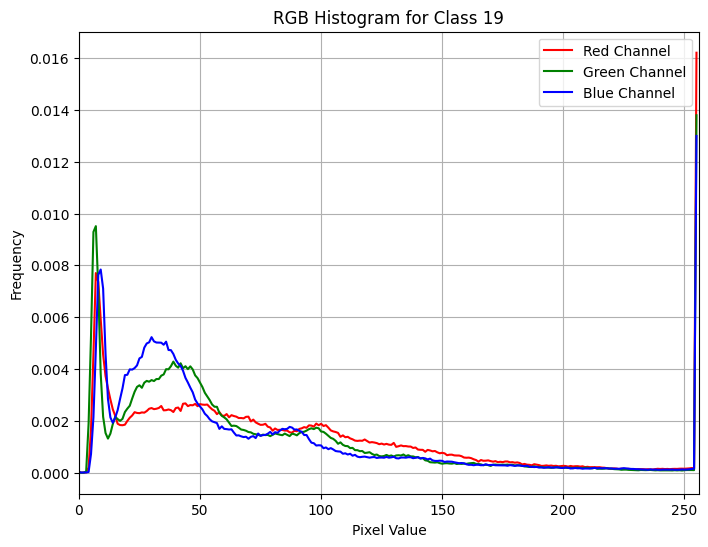

(3, 256, 1)


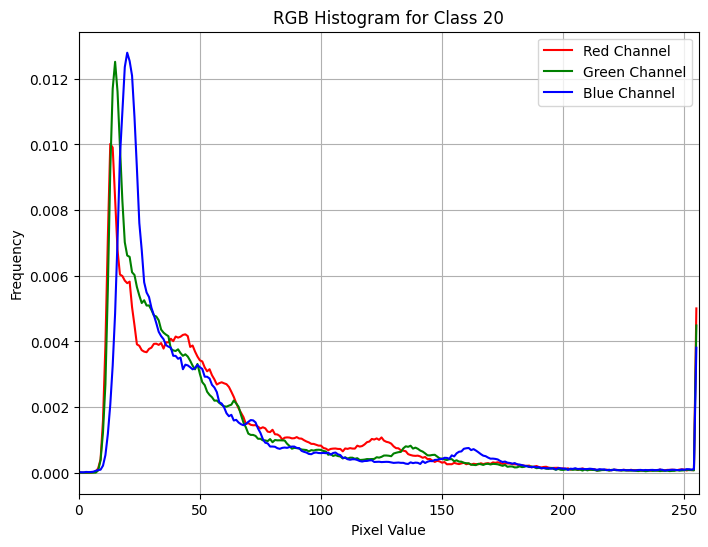

(3, 256, 1)


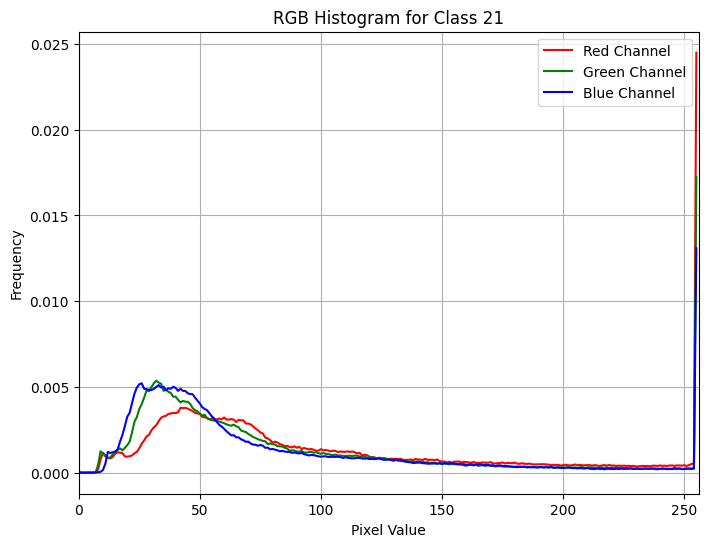

(3, 256, 1)


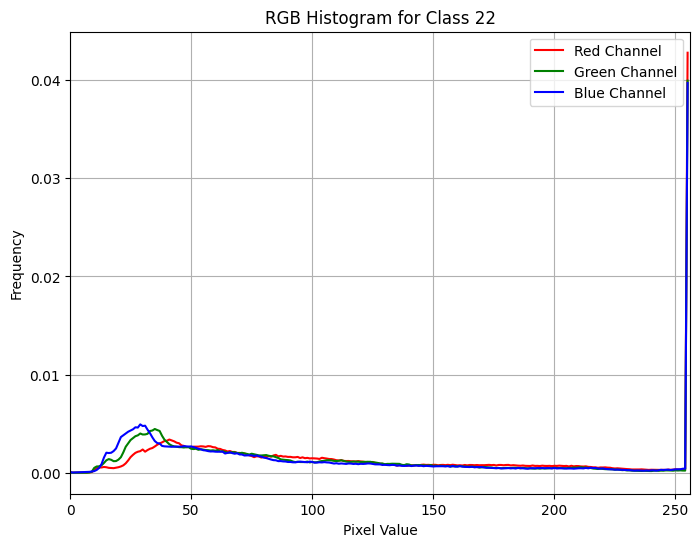

(3, 256, 1)


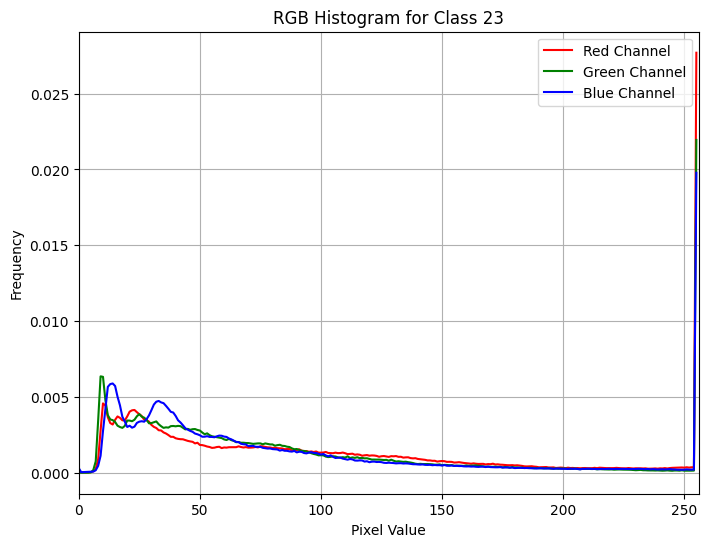

(3, 256, 1)


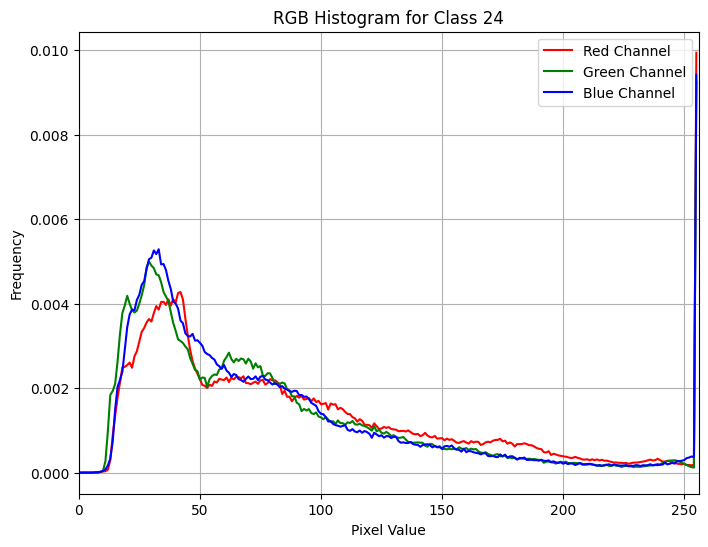

(3, 256, 1)


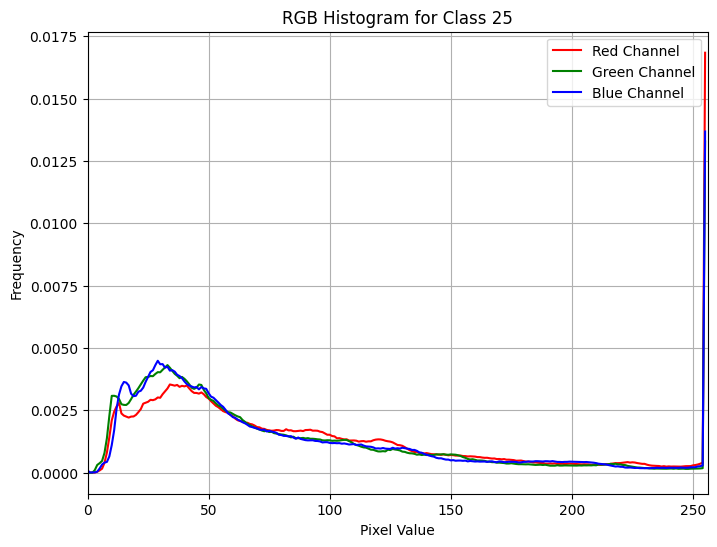

(3, 256, 1)


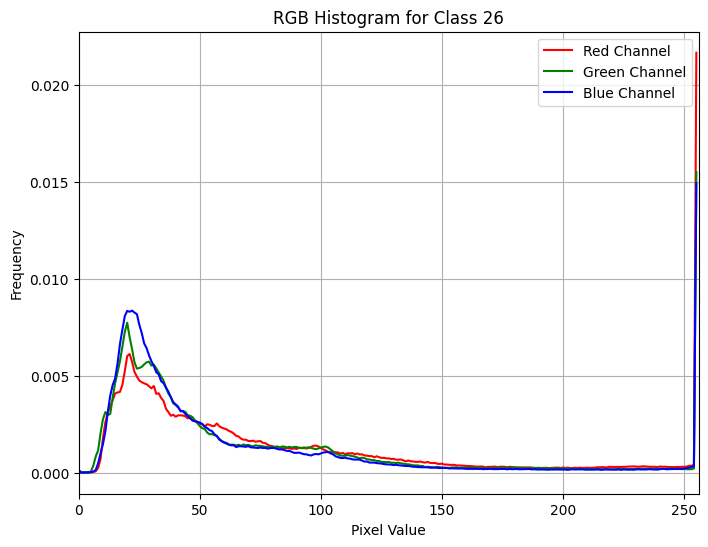

(3, 256, 1)


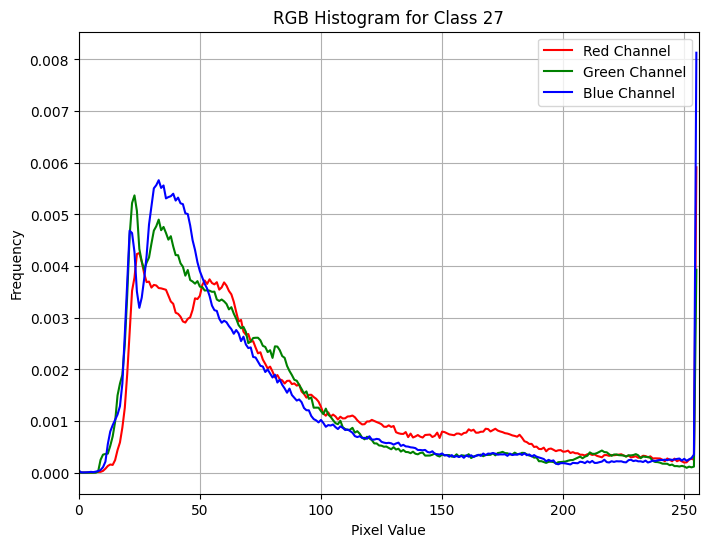

(3, 256, 1)


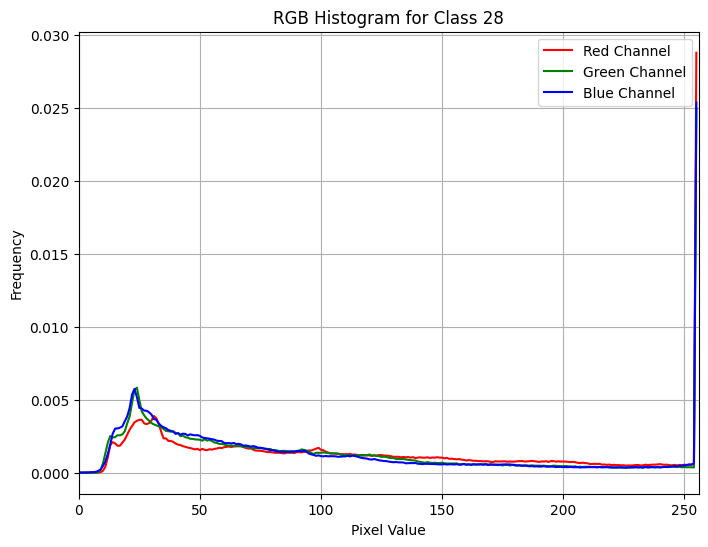

(3, 256, 1)


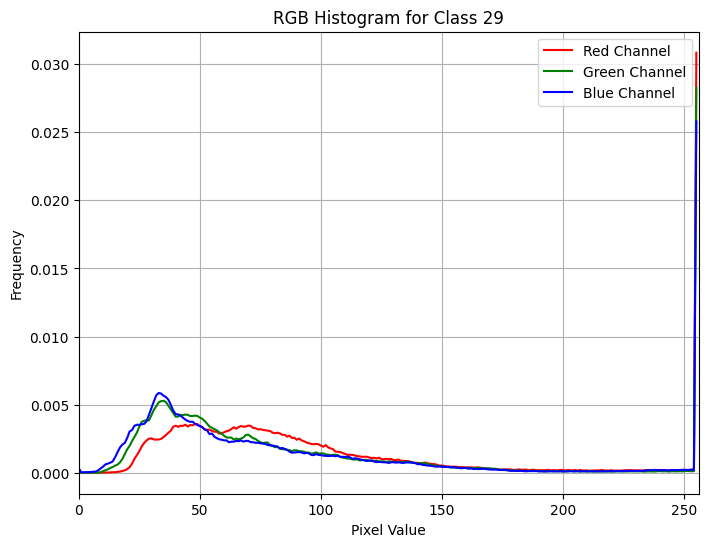

(3, 256, 1)


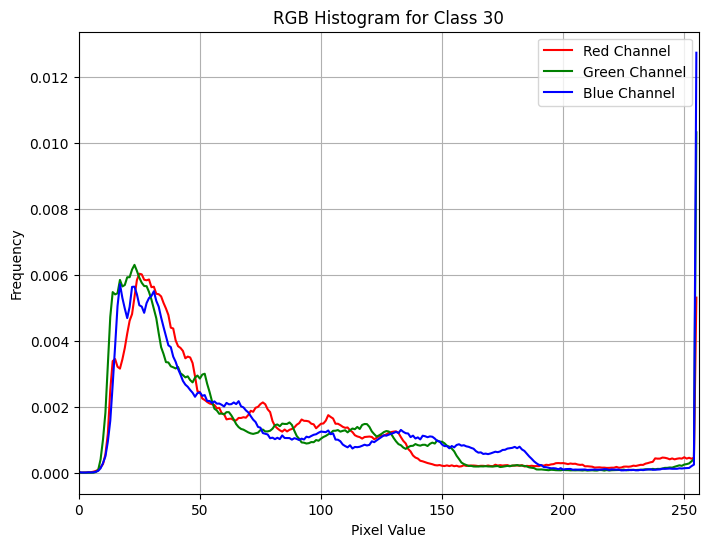

(3, 256, 1)


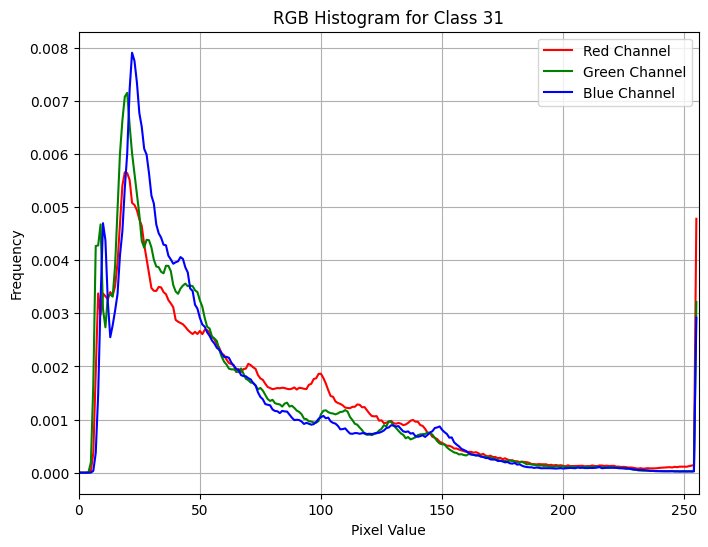

(3, 256, 1)


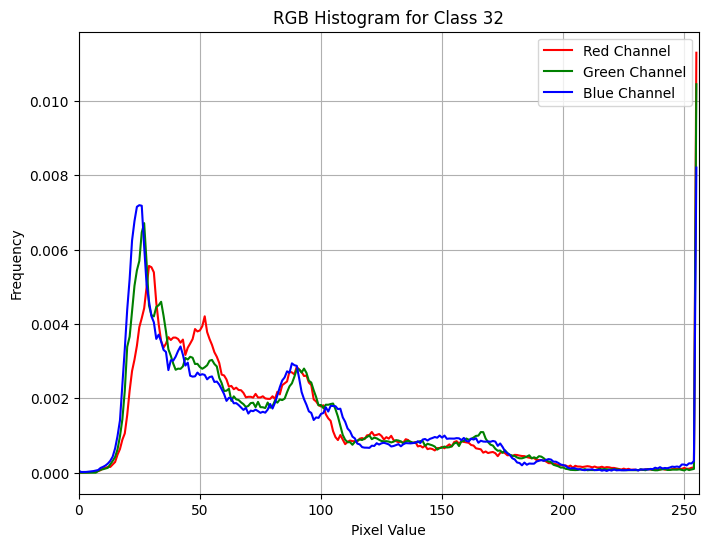

(3, 256, 1)


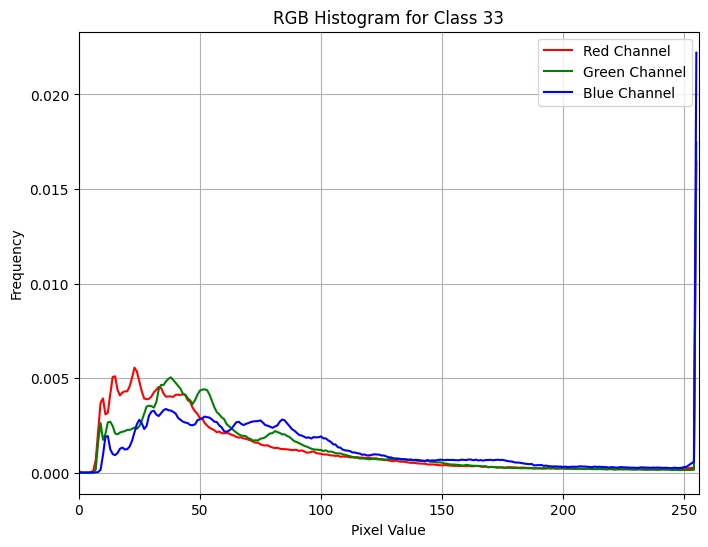

(3, 256, 1)


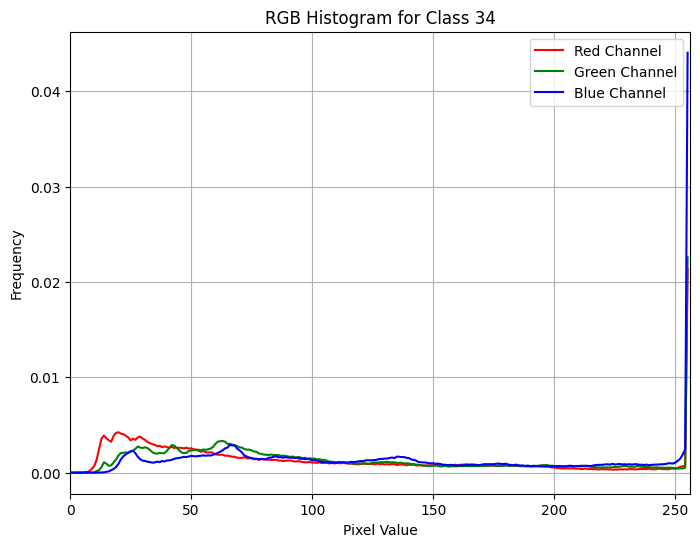

(3, 256, 1)


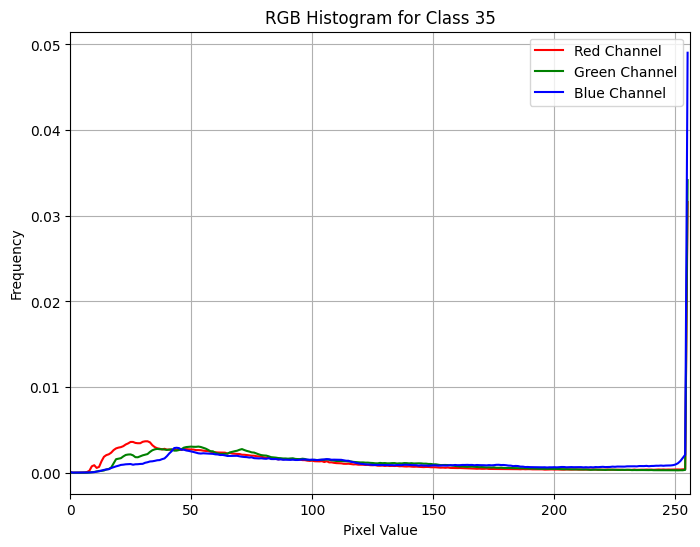

(3, 256, 1)


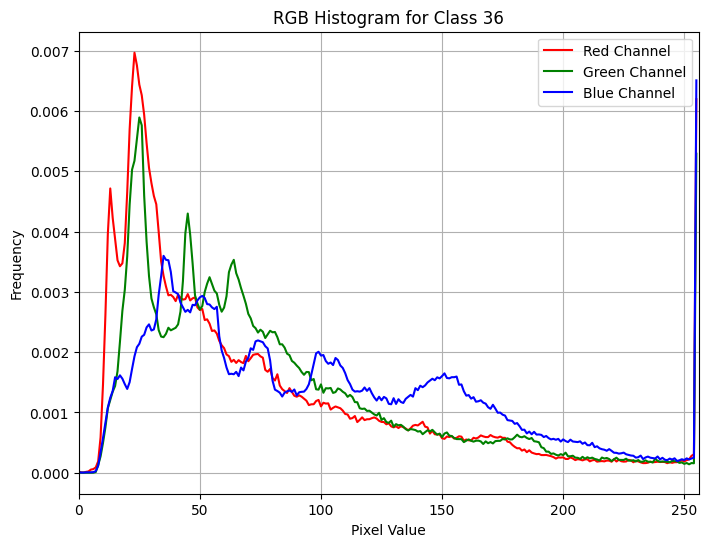

(3, 256, 1)


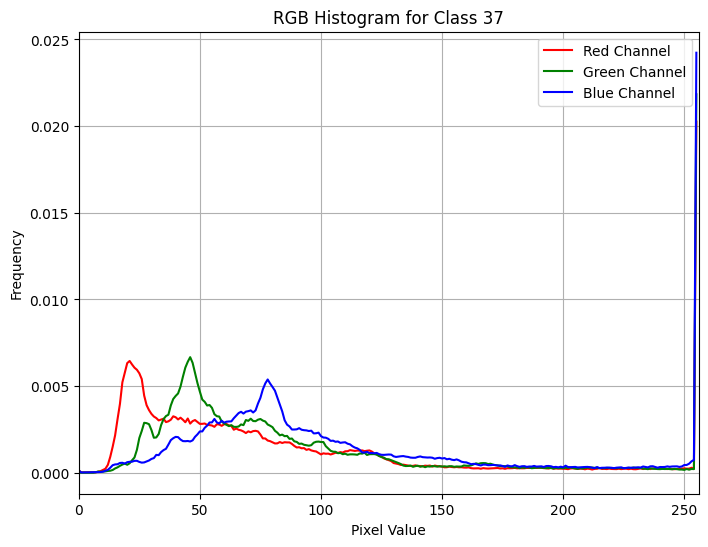

(3, 256, 1)


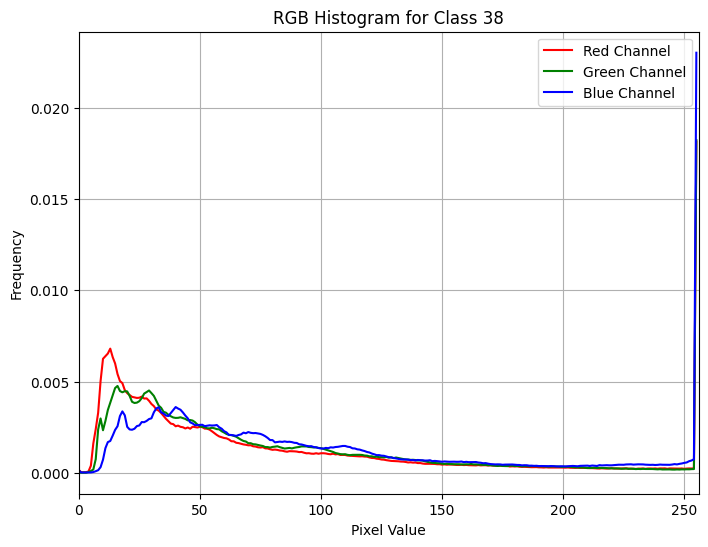

(3, 256, 1)


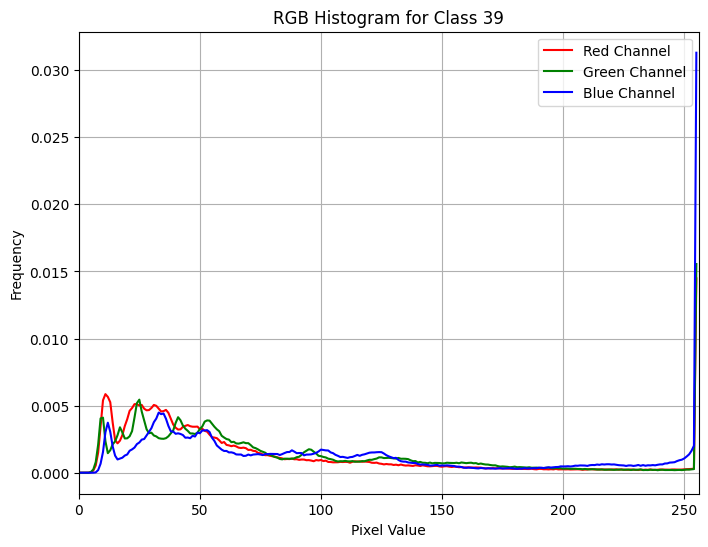

(3, 256, 1)


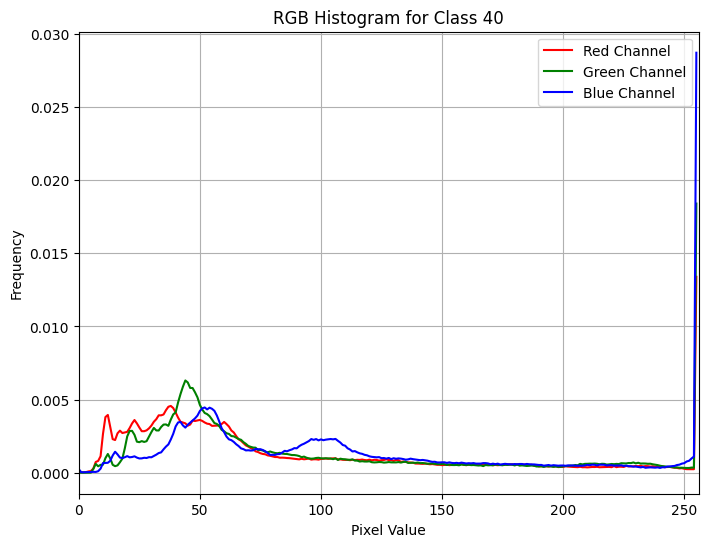

(3, 256, 1)


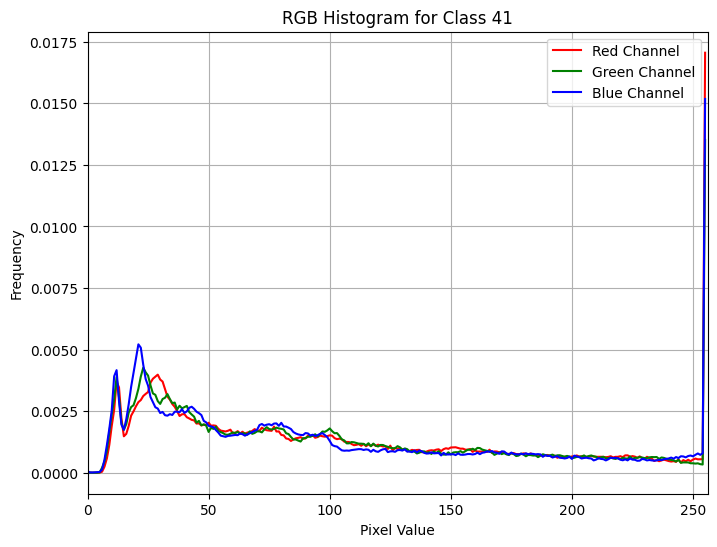

(3, 256, 1)


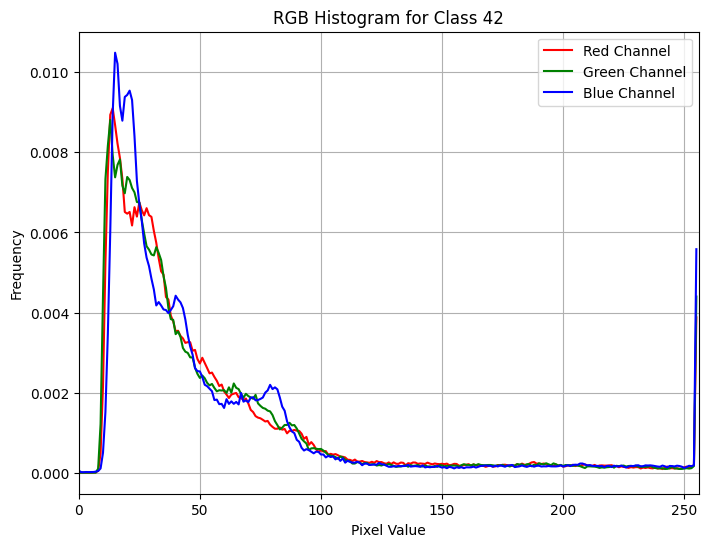

(3, 256, 1)


In [16]:
# plot histogram for each class
for class_id, histogram in train_classes_histograms.items():
    plot_channel_histograms_for_class(class_id, np.squeeze(histogram))
    print(histogram.shape)

In [72]:
# get histograms in HSV quantified
def get_histograms_HSV(class_regions, bins = (10, 10, 10)):
    # Create a dictionary to store histograms for each class
    class_histograms = {}

    # Iterate through each class
    for class_label, regions in class_regions.items():
        # Initialize an empty list to store histograms for this class
        histograms_H = []
        histograms_S = []
        histograms_V = []

        for region in regions:
            # Calculate and store the histogram
            pixel_count = region.size  # Calculate pixel count
            region = cv2.cvtColor(region, cv2.COLOR_BGR2HSV)
            histogram_H = np.array(cv2.calcHist([region], [0], None, [bins[0]], [0, 180])) / pixel_count
            histogram_S = np.array(cv2.calcHist([region], [1], None, [bins[1]], [0, 256])) / pixel_count
            histogram_V = np.array(cv2.calcHist([region], [2], None, [bins[2]], [0, 256])) / pixel_count
            histograms_H.append(histogram_H)
            histograms_S.append(histogram_S)
            histograms_V.append(histogram_V)
        # Compute the average histogram for the class
        average_histogram_H = np.mean(np.array(histograms_H), axis=0)
        average_histogram_S = np.mean(np.array(histograms_S), axis=0)
        average_histogram_V = np.mean(np.array(histograms_V), axis=0)
        # Store the average histogram
        class_histograms[class_label] = [average_histogram_H, average_histogram_S, average_histogram_V]
        
    return class_histograms

In [73]:
train_classes_histograms_HSV = get_histograms_HSV(train_dict)

In [113]:
def plot_channel_HSV_histograms_for_class(class_label, histograms):
    plt.figure(figsize=(12, 4))
    plt.title(f'HSV Histogram for Class {class_label}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Hue
    ax = plt.subplot(131)
    plt.title('Hue Channel Histogram')
    plt.xlim([0, max(histograms[0].shape) - 1])
    h_scale_factor = 180.0 / max(histograms[0].shape)
    xticks = np.arange(0, 180.0, h_scale_factor)
    plt.plot(xticks, histograms[0], color='red')
    plt.grid()

    # Saturation
    fig, ax = plt.subplot(132)
    plt.title('Saturation Channel Histogram')
    plt.xlim([0, max(histograms[1].shape) - 1])
    s_scale_factor = 256.0 / max(histograms[1].shape)
    xticks = np.arange(0, 256.0, s_scale_factor)
    plt.plot(xticks, histograms[1], color='grey')
    plt.grid()

    # Value
    fig, ax = plt.subplot(133)
    plt.title('Value Channel Histogram')
    plt.xlim([0, max(histograms[2].shape) - 1])
    v_scale_factor = 256.0 / max(histograms[2].shape)
    xticks = np.arange(0, 256.0, v_scale_factor)
    plt.plot(xticks, histograms[2], color='gold')
    plt.grid()

    plt.tight_layout()
    plt.show()

/var/folders/lg/9zhrbtxs2wb2227l39_4zqx00000gn/T/ipykernel_2993/1842187936.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(131)


TypeError: cannot unpack non-iterable Axes object

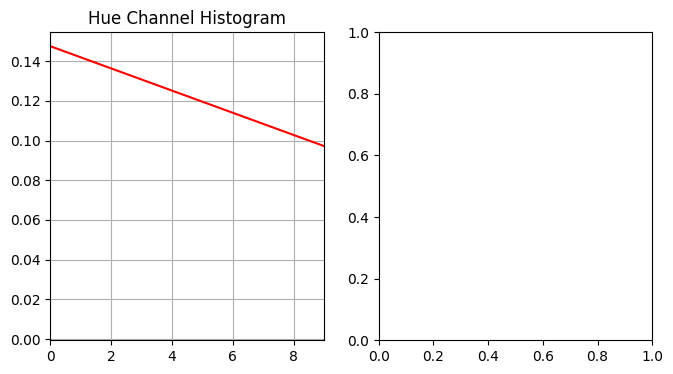

In [114]:
# plot histogram for each class
for class_id, histogram_HSV in train_classes_histograms_HSV.items():
    plot_channel_HSV_histograms_for_class(class_id, np.squeeze(histogram_HSV))

In [ ]:
input_path = data_dir
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

In [ ]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap='viridis')
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

In [ ]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [ ]:
images_show = []
titles_show = []
for i in range(0, 5):
    r = random.randint(1, 60000)
    images_show.append(x_train[r])
    titles_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_show.append(x_test[r])        
    titles_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_show, titles_show)

In [ ]:
def plot_distribution(subset_name, class_counts, class_labels):
    plt.figure(figsize=(10, 6))

    # Add grid lines on x, y
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Create a bar plot
    bars = plt.bar(class_labels, class_counts)

    # Add count text on top of the bars
    for bar, count in zip(bars, class_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, count, str(count),
                 ha='center', va='bottom')

    plt.xticks(class_labels)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title(f"{subset_name} class distribution")
    plt.show()

In [ ]:
# Class distribution for train subset
train_class_counts = np.bincount(y_train)
train_class_labels = np.unique(y_train)
plot_distribution('Train', train_class_counts, train_class_labels)

In [ ]:
# Class distribution for test subset
test_class_counts = np.bincount(y_test)
test_class_labels = np.unique(y_test)
plot_distribution('Test', test_class_counts, test_class_labels)

In [ ]:
# Feature analysis (pixel intensity distribution for the whole dataset)
def draw_pixel_distribution(subset_name, data, grouping=30):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=grouping, range=(0, 256))
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title(f"{subset_name} pixel intensity distribution [bins={grouping}]")
    # Add grid lines on x, y
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

In [ ]:
# cast list of list to np.array
x_train = [np.array(sublist) for sublist in x_train]
x_test = [np.array(sublist) for sublist in x_test]

In [ ]:
# draw pixel distribution for train
draw_pixel_distribution('Train', np.concatenate(x_train).flatten())

In [ ]:
# draw pixel distribution for test
draw_pixel_distribution('Test', np.concatenate(x_test).flatten())

In [ ]:
# isolation forest for abnormality in histogram
from sklearn.ensemble import IsolationForest
import cv2

In [ ]:
# take out classes one by one
desired_class = 6
# find indices where the value occurs
indices = [i for i, x in enumerate(y_train) if x == desired_class]
# get values of these classes
desired_class_x = [x_train[i] for i in indices]
# create list with annotations
desired_class_y = [desired_class] * len(desired_class_x)
# show few elements
images_show = []
titles_show = []
for i in range(0, 10):
    r = random.randint(1, len(desired_class_x))
    images_show.append(desired_class_x[r])
    titles_show.append('Class ' + str(desired_class_y[r]) + ' training image [' + str(r) + '] = ' + str(desired_class_y[r])) 
    
show_images(images_show, titles_show)

In [ ]:
# randomly select defined number of image and introduce noise in the digits
noisy_image_count = 5
indices_for_noise = random.sample(range(len(desired_class_x)), noisy_image_count)

images_show = []
titles_show = []

print(f'Noisy images: {indices_for_noise}')
for i in indices_for_noise:
    # Create a binary mask to identify non-zero pixels
    foreground_mask = (desired_class_x[i] > 0).astype(np.uint8)

    # Define the parameters for Gaussian noise
    mean = 1
    stddev = 15  # Adjust this value to control the noise level

    # Generate Gaussian noise for the foreground
    noise = np.random.normal(mean, stddev, desired_class_x[i].shape).astype(np.uint8)
    noisy_foreground = np.where(foreground_mask == 1, desired_class_x[i] + noise, 0)

    # Combine the noisy foreground with the original image
    desired_class_x[i] = np.where(foreground_mask == 1, noisy_foreground, desired_class_x[i])
    
    # to visualize
    images_show.append(desired_class_x[i])
    titles_show.append('Class ' + str(desired_class) + ' image ' + str(i))                       
show_images(images_show, titles_show)

In [ ]:
# image data to histogram
bins = 30
desired_class_x_histograms = [cv2.calcHist([image], [0], None, [bins], [0, bins]).flatten() for image in desired_class_x]

In [ ]:
# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', n_estimators=1000, max_features=10, random_state=99)

# Fit the model on the data
isolation_forest.fit(desired_class_x_histograms)

In [ ]:
# Predict the anomaly score for each data point
anomaly_scores = isolation_forest.decision_function(desired_class_x_histograms)

# Visualize the anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, range=(-0.2, 0.2), color='blue', alpha=0.7)
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.title("Anomaly Score Distribution")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# get sorting indices from the smallest (biggest anomaly)
anomaly_score_indices = np.argsort(anomaly_scores)
print(anomaly_score_indices)

In [ ]:
# lets print some images with most anomaly
images_show = []
titles_show = []
for i in range(0, 20):
    index = anomaly_score_indices[i]
    images_show.append(desired_class_x[index])
    titles_show.append('Class ' + str(desired_class) + ' image [' + str(index) + '] anomaly score = ' + "{:.2f}".format(round(anomaly_scores[index], 2))) 
    
show_images(images_show, titles_show)

In [ ]:
# draw best sample
# lets print some images with most anomaly
images_show = []
titles_show = []
for i in range(0, 20):
    index = anomaly_score_indices[len(anomaly_score_indices)-i-1]
    images_show.append(desired_class_x[index])
    titles_show.append('Class ' + str(desired_class) + ' image [' + str(index) + '] anomaly score = ' + "{:.2f}".format(round(anomaly_scores[index], 2))) 
    
show_images(images_show, titles_show)